In [1]:
import numpy as np
import pandas as pd

In [7]:
energy = pd.read_csv('per-capita-energy-use.csv')
energy.head()

,Entity,Code,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,1980,583.294434
1,Afghanistan,AFG,1981,666.378235
2,Afghanistan,AFG,1982,725.659912
3,Afghanistan,AFG,1983,912.139587
4,Afghanistan,AFG,1984,941.392578


In [60]:
energy['Primary energy consumption per capita (kWh/person)'].isnull().values.any()

False

In [19]:
group=pd.read_excel('EconGroup.xlsx')
group.head()

,Entity,income group
0,Australia,Advanced Economies
1,Austria,Advanced Economies
2,Belgium,Advanced Economies
3,Canada,Advanced Economies
4,Cyprus,Advanced Economies


In [20]:
combine=energy.merge(group,on=['Entity'],how='left')

In [21]:
display(combine)

,Entity,Code,Year,Primary energy consumption per capita (kWh/person),income group
0,Afghanistan,AFG,1980,583.294434,Low-Income Developing\nCountries\n
1,Afghanistan,AFG,1981,666.378235,Low-Income Developing\nCountries\n
2,Afghanistan,AFG,1982,725.659912,Low-Income Developing\nCountries\n
3,Afghanistan,AFG,1983,912.139587,Low-Income Developing\nCountries\n
4,Afghanistan,AFG,1984,941.392578,Low-Income Developing\nCountries\n
...,...,...,...,...,...
10210,Zimbabwe,ZWE,2015,3956.025879,Low-Income Developing\nCountries\n
10211,Zimbabwe,ZWE,2016,3326.073486,Low-Income Developing\nCountries\n
10212,Zimbabwe,ZWE,2017,3226.616943,Low-Income Developing\nCountries\n
10213,Zimbabwe,ZWE,2018,3289.887451,Low-Income Developing\nCountries\n


In [27]:
combine.to_excel(r'C:\Users\demiz\OneDrive - Johns Hopkins\Yawen\career\Combine.xlsx', index=False)

In [61]:
Sumbygroup=combine.groupby(by=[ 'income group','Year'])["Primary energy consumption per capita (kWh/person)"].sum()
display(Meanbygroup)

income group                        Year
Advanced Economies                  1965    35663.681490
                                    1966    36886.374268
                                    1967    38092.575721
                                    1968    40734.492732
                                    1969    42715.671537
                                                ...     
Low-Income Developing\nCountries\n  2017     2965.556271
                                    2018     3030.133296
                                    2019     3165.560852
                                    2020    10093.928223
                                    2021    10366.062012
Name: Primary energy consumption per capita (kWh/person), Length: 171, dtype: float64

In [42]:
Meanbygroup=combine.groupby(by=[ 'income group','Year'])["Primary energy consumption per capita (kWh/person)"].mean()
display(Meanbygroup)

income group                        Year
Advanced Economies                  1965    35663.681490
                                    1966    36886.374268
                                    1967    38092.575721
                                    1968    40734.492732
                                    1969    42715.671537
                                                ...     
Low-Income Developing\nCountries\n  2017     2965.556271
                                    2018     3030.133296
                                    2019     3165.560852
                                    2020    10093.928223
                                    2021    10366.062012
Name: Primary energy consumption per capita (kWh/person), Length: 171, dtype: float64

In [51]:
Stats=combine.groupby(by=[ 'income group','Year'])["Primary energy consumption per capita (kWh/person)"].describe(include='all').T
display(Stats)

income group Advanced Economies                                               \
Year                       1965           1966           1967           1968   
count                 26.000000      26.000000      26.000000      26.000000   
mean               35663.681490   36886.374268   38092.575721   40734.492732   
std                25477.207629   24667.549896   24282.866410   26011.121488   
min                 5622.628418    6189.219238    6666.073242    6836.810059   
25%                19883.240723   21850.874023   23918.399414   26071.311035   
50%                31917.065430   33595.783203   34428.017578   38578.939453   
75%                41884.500977   41642.475586   41804.437500   43239.299805   
max               126617.562500  120500.734375  118035.382812  127055.218750   

income group                                                              \
Year                   1969           1970           1971           1972   
count             26.000000      26.000000      26.000000      26.000000   
mean           42715.671537   45173.840633   45638.060847   47910.437538   
std            27226.909982   28083.294406   27095.650713   28050.801181   
min             7440.564453    8886.771484    9730.008789   10470.583008   
25%            28629.828125   27443.226562   28729.092285   29849.512695   
50%            38403.072266   41287.343750   40695.646484   43184.867188   
75%            46282.899414   50416.160156   53057.137695   57786.459961   
max           136031.625000  140374.343750  133957.484375  136986.843750   

income group                                ...  \
Year                   1973           1974  ...   
count             26.000000      26.000000  ...   
mean           50502.165903   49400.484600  ...   
std            29532.351772   29588.880505  ...   
min            11419.440430   11779.037109  ...   
25%            31429.286133   31205.083984  ...   
50%            45244.566406   42148.542969  ...   
75%            62672.536133   59249.238281  ...   
max           143937.296875  144918.500000  ...   

income group Low-Income Developing\nCountries\n                              \
Year                                       2012          2013          2014   
count                                 51.000000     51.000000     51.000000   
mean                                2808.323365   2888.570266   2912.756908   
std                                 4214.904524   4417.196578   4292.263287   
min                                  218.229492    223.274490    209.089905   
25%                                  675.952942    738.745972    741.444702   
50%                                 1727.840088   1597.086426   1908.697754   
75%                                 2775.946045   2769.645874   2870.304443   
max                                23089.316406  25264.496094  23892.597656   

income group                                                          \
Year                  2015          2016          2017          2018   
count            51.000000     51.000000     51.000000     51.000000   
mean           2895.258730   2910.495458   2965.556271   3030.133296   
std            4280.858141   4257.232520   4255.525963   4183.996578   
min             204.569504    216.683624    248.650681    242.626480   
25%             796.436554    813.917786    800.476044    854.082092   
50%            1865.516602   1769.648193   1882.353516   1868.832520   
75%            2894.244141   2857.174316   2971.915405   3220.485107   
max           24718.353516  25132.646484  24674.537109  23377.166016   

income group                                            
Year                  2019          2020          2021  
count            51.000000      3.000000      3.000000  
mean           3165.560852  10093.928223  10366.062012  
std            4842.860294   6670.040972   6866.352685  
min             235.506668   2664.447754   2762.144043  
25%             944.385101   7357.416260   7492.698486  
50%            1

In [56]:
Stats.to_excel(r'C:\Users\demiz\OneDrive - Johns Hopkins\Yawen\career\Stats.xlsx')

Column  ('Advanced Economies', 1965)


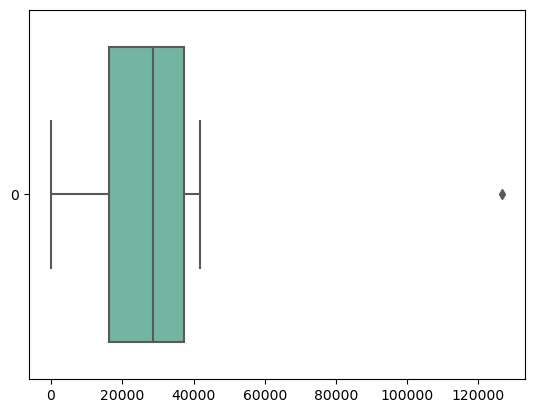

Column  ('Advanced Economies', 1966)


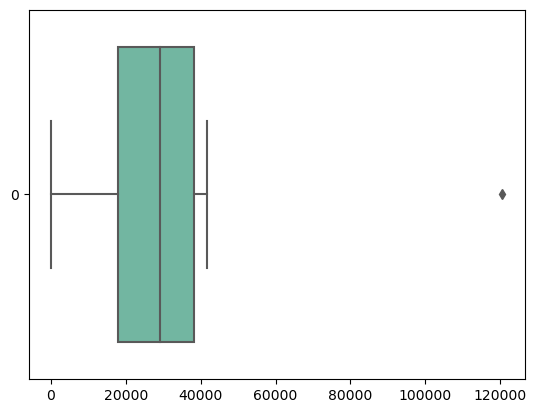

Column  ('Advanced Economies', 1967)


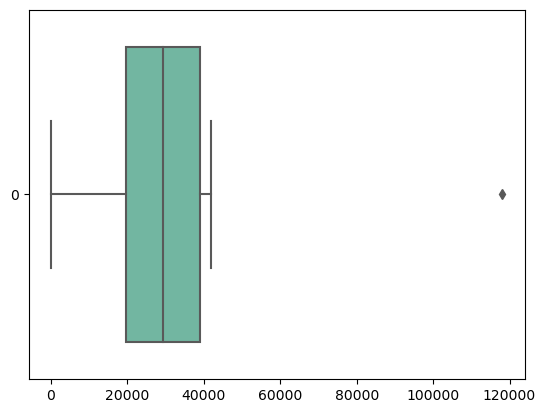

Column  ('Advanced Economies', 1968)


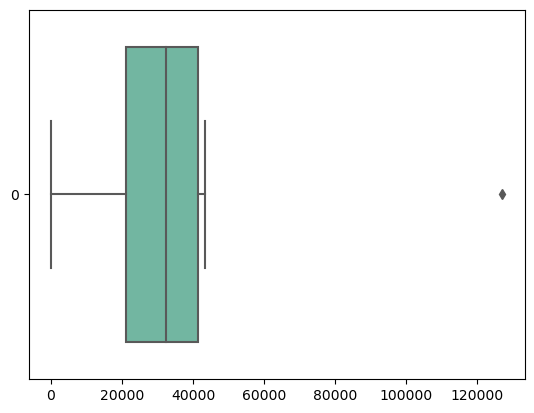

Column  ('Advanced Economies', 1969)


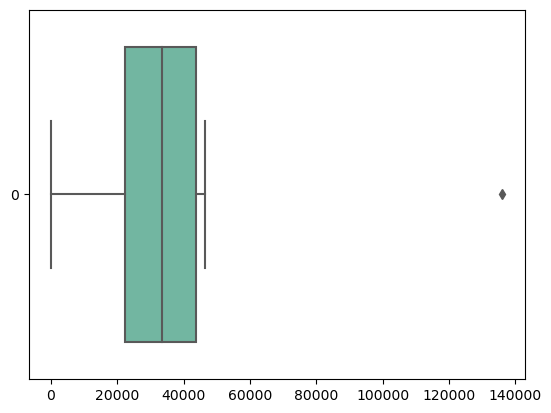

Column  ('Advanced Economies', 1970)


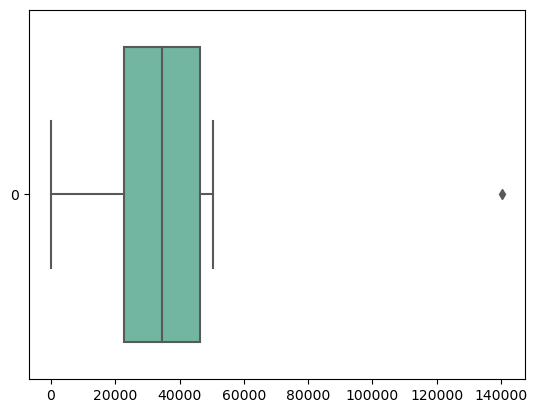

Column  ('Advanced Economies', 1971)


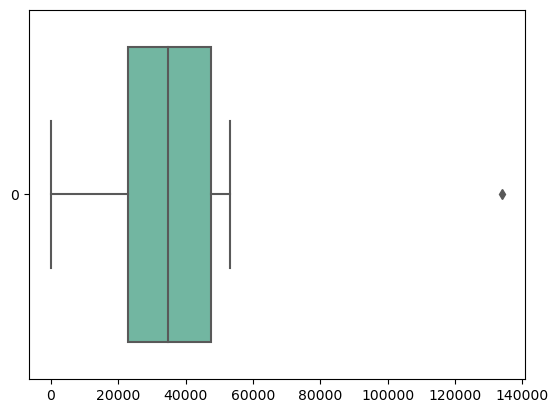

Column  ('Advanced Economies', 1972)


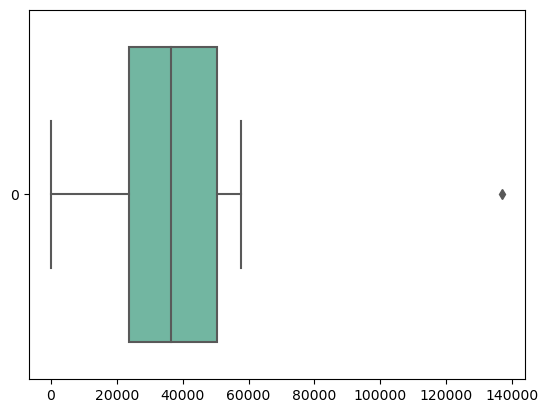

Column  ('Advanced Economies', 1973)


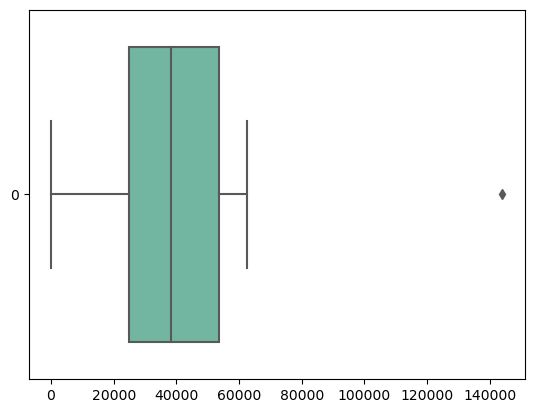

Column  ('Advanced Economies', 1974)


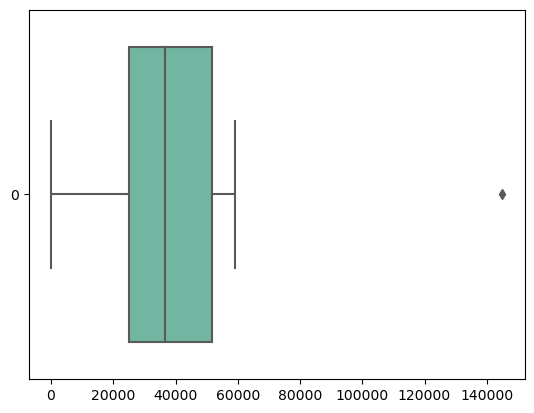

Column  ('Advanced Economies', 1975)


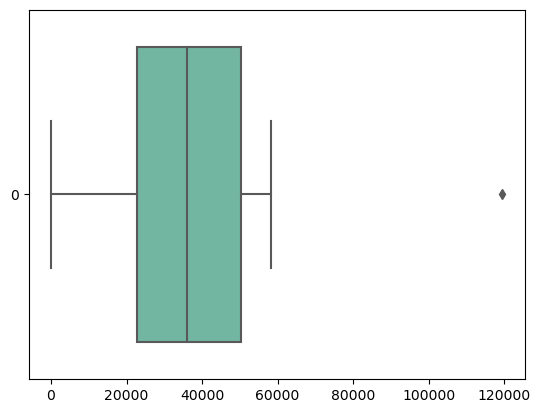

Column  ('Advanced Economies', 1976)


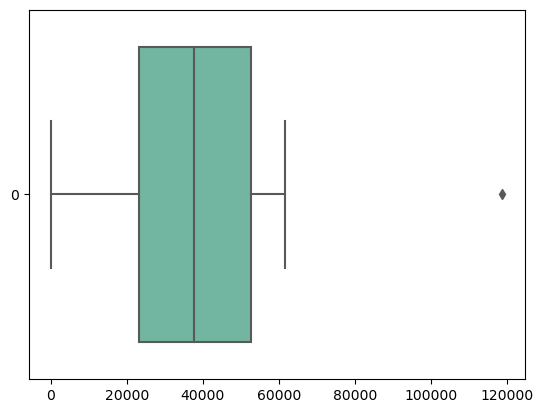

Column  ('Advanced Economies', 1977)


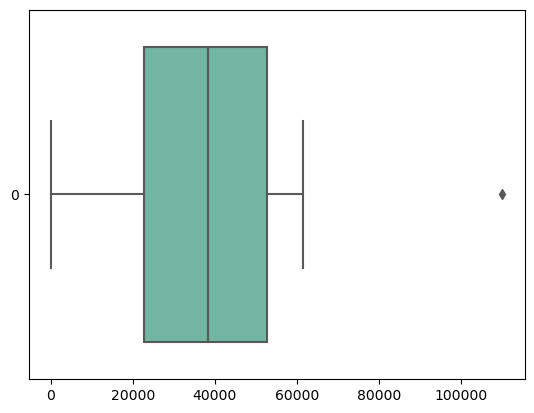

Column  ('Advanced Economies', 1978)


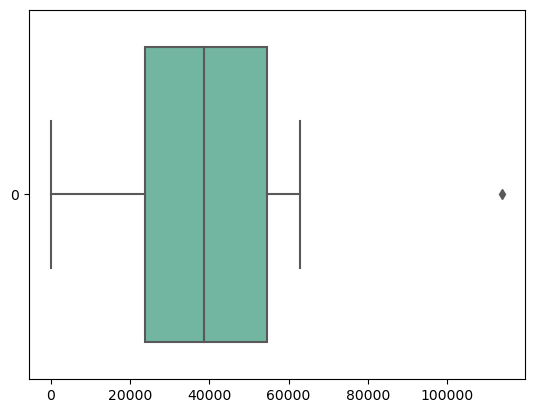

Column  ('Advanced Economies', 1979)


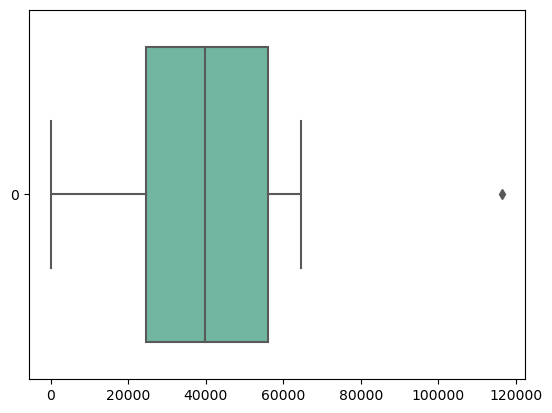

Column  ('Advanced Economies', 1980)


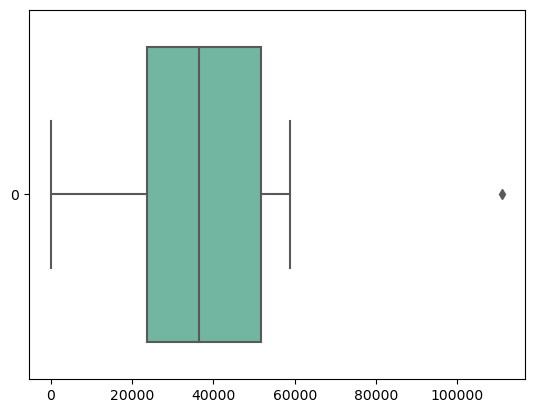

Column  ('Advanced Economies', 1981)


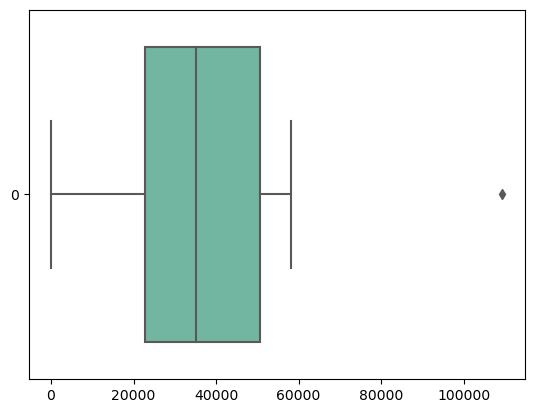

Column  ('Advanced Economies', 1982)


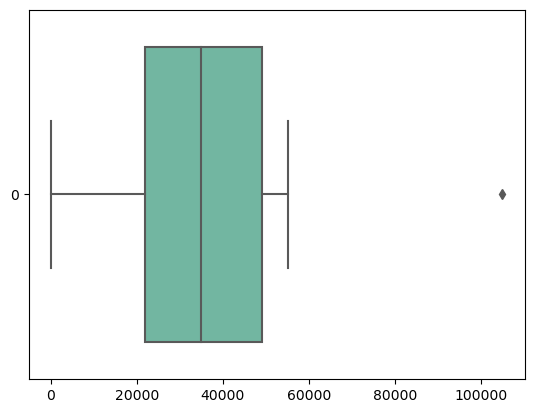

Column  ('Advanced Economies', 1983)


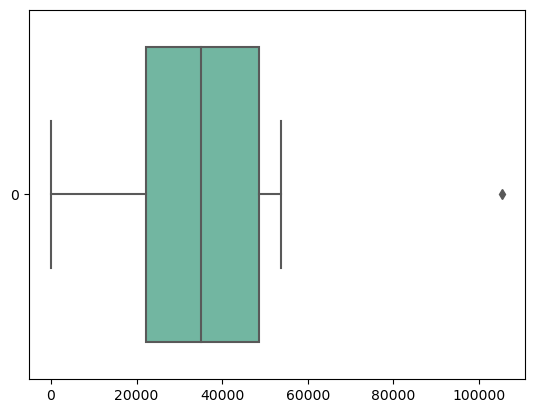

Column  ('Advanced Economies', 1984)


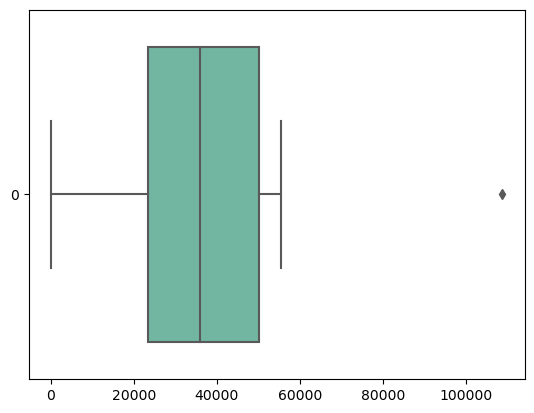

Column  ('Advanced Economies', 1985)


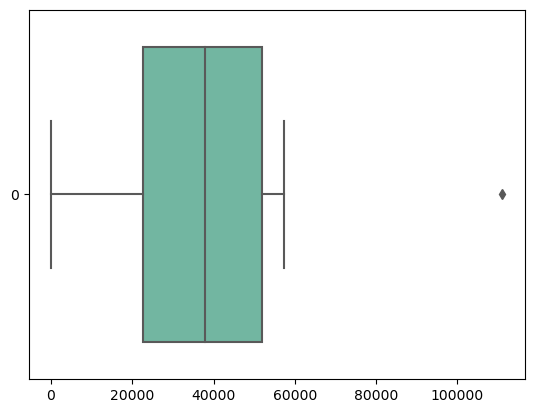

Column  ('Advanced Economies', 1986)


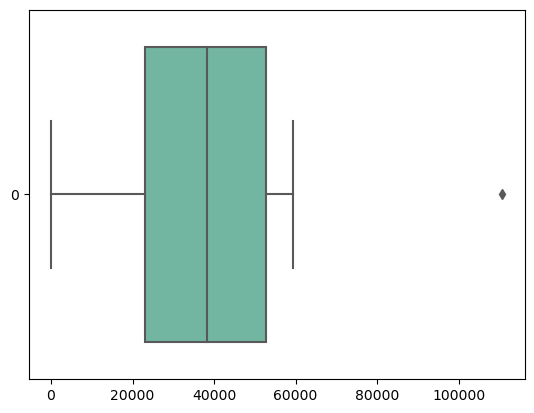

Column  ('Advanced Economies', 1987)


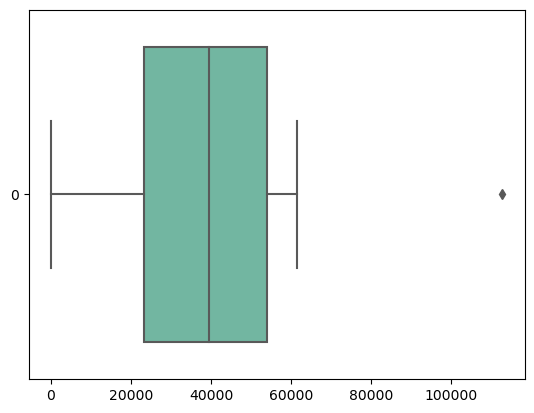

Column  ('Advanced Economies', 1988)


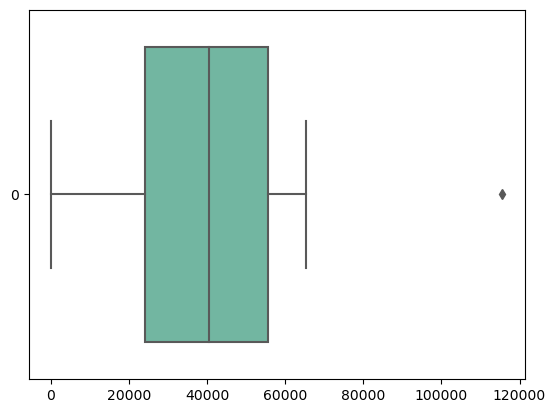

Column  ('Advanced Economies', 1989)


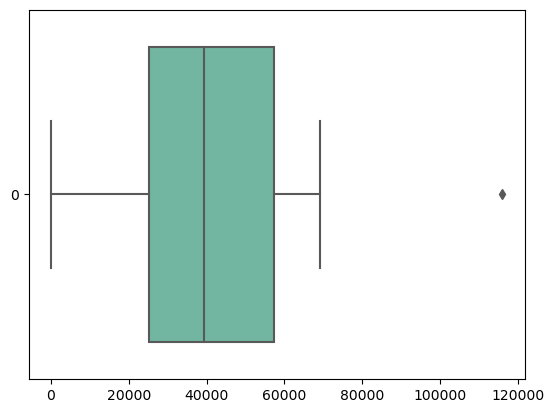

Column  ('Advanced Economies', 1990)


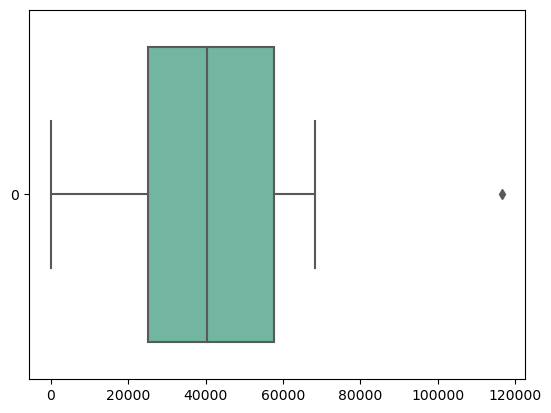

Column  ('Advanced Economies', 1991)


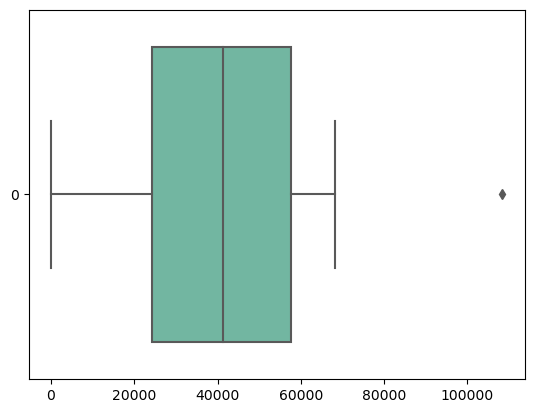

Column  ('Advanced Economies', 1992)


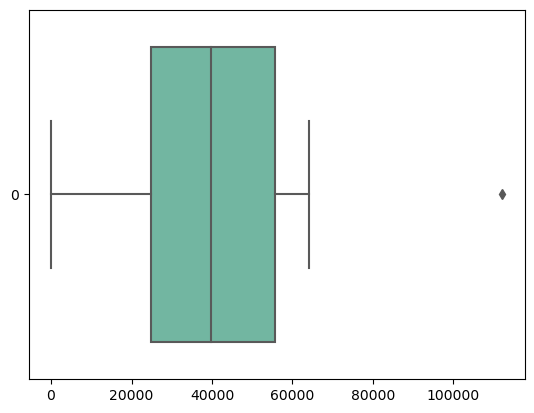

Column  ('Advanced Economies', 1993)


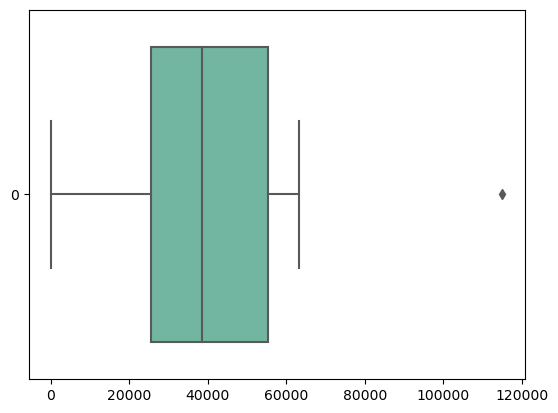

Column  ('Advanced Economies', 1994)


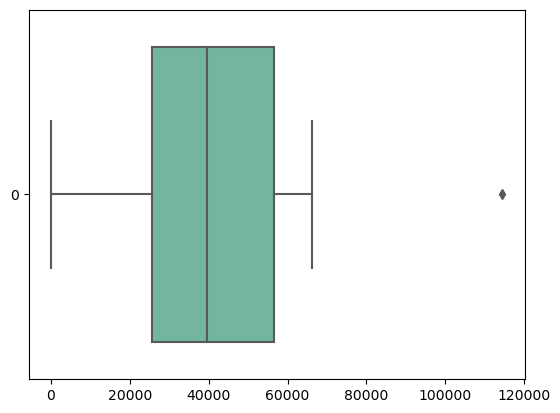

Column  ('Advanced Economies', 1995)


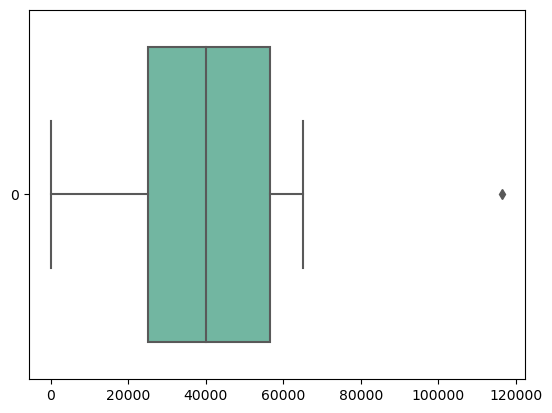

Column  ('Advanced Economies', 1996)


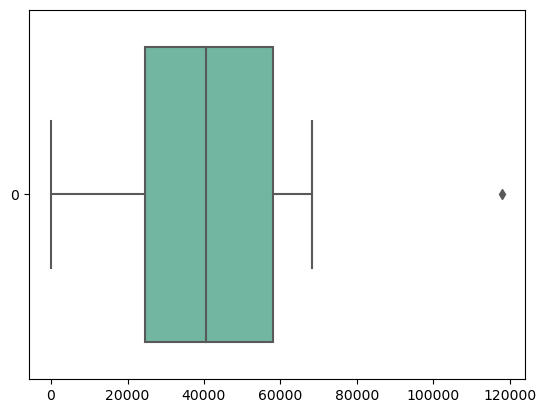

Column  ('Advanced Economies', 1997)


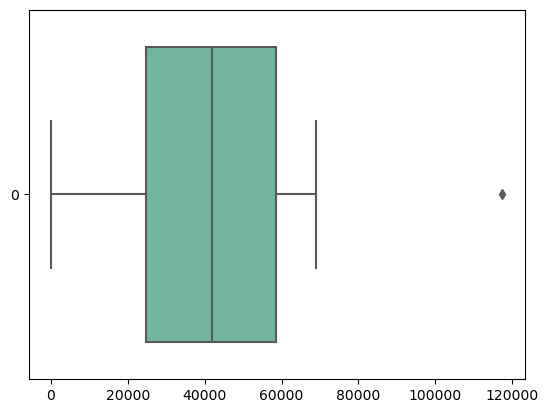

Column  ('Advanced Economies', 1998)


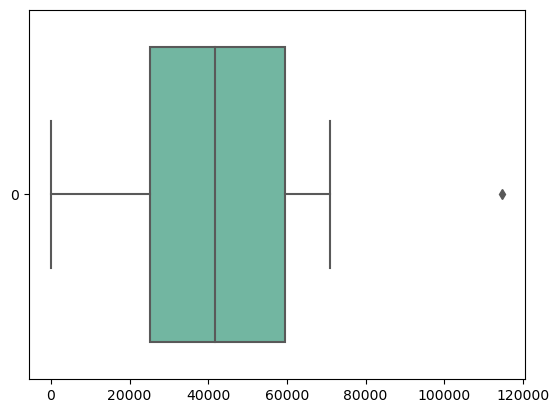

Column  ('Advanced Economies', 1999)


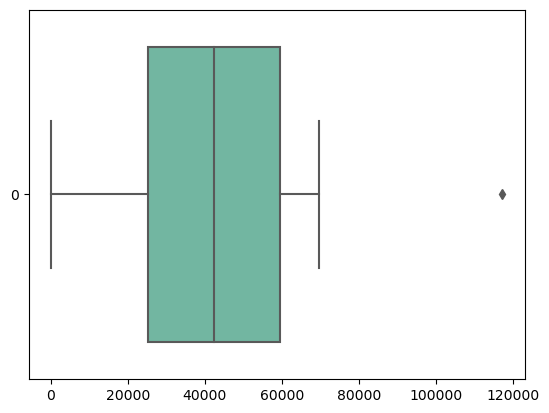

Column  ('Advanced Economies', 2000)


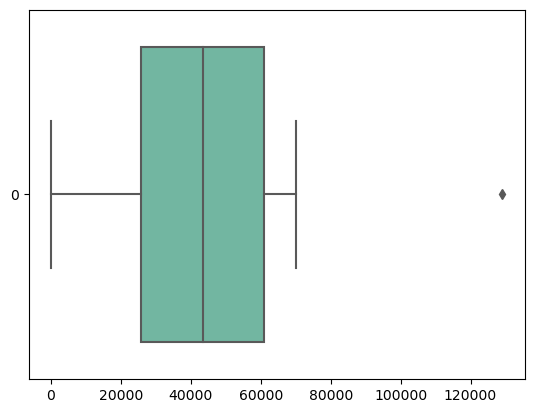

Column  ('Advanced Economies', 2001)


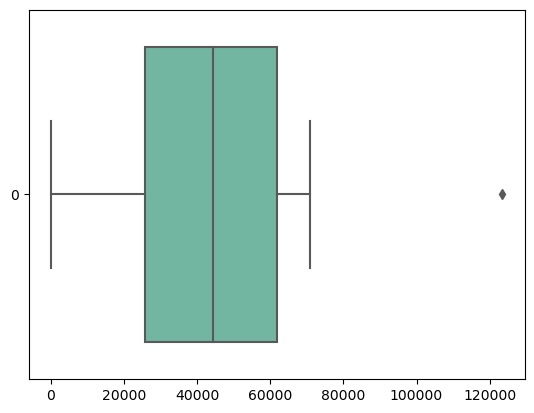

Column  ('Advanced Economies', 2002)


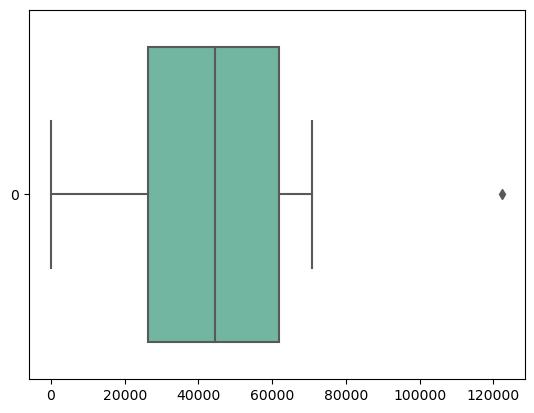

Column  ('Advanced Economies', 2003)


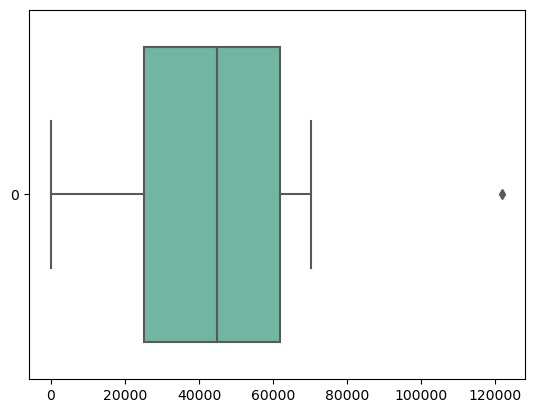

Column  ('Advanced Economies', 2004)


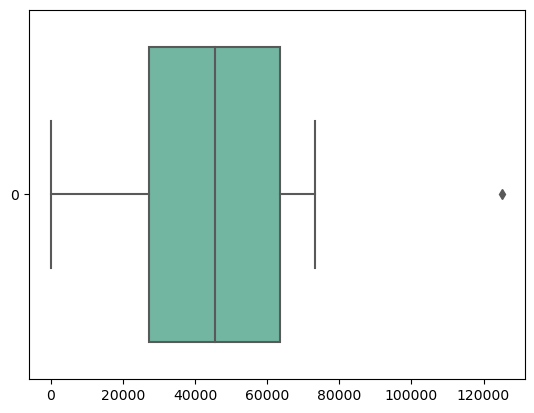

Column  ('Advanced Economies', 2005)


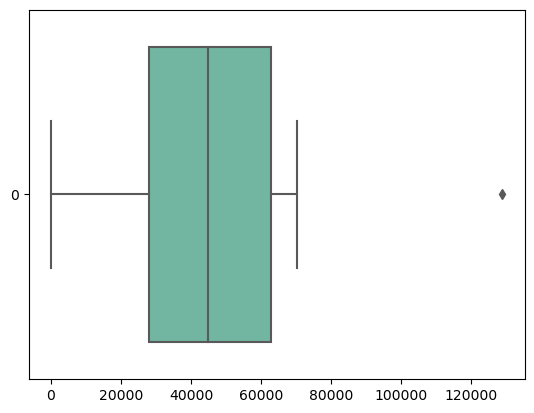

Column  ('Advanced Economies', 2006)


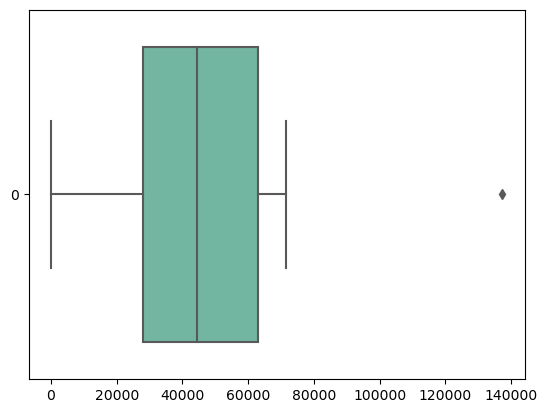

Column  ('Advanced Economies', 2007)


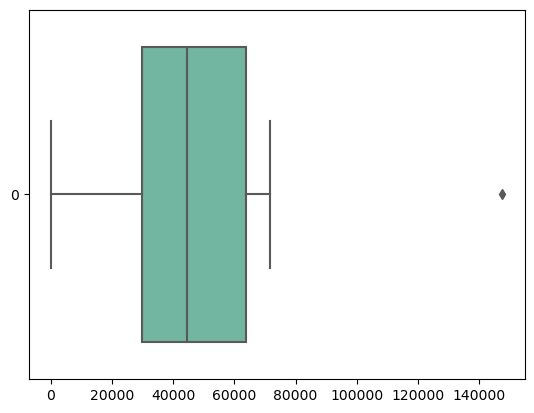

Column  ('Advanced Economies', 2008)


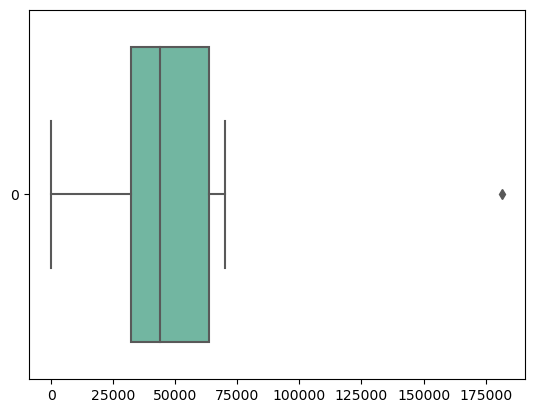

Column  ('Advanced Economies', 2009)


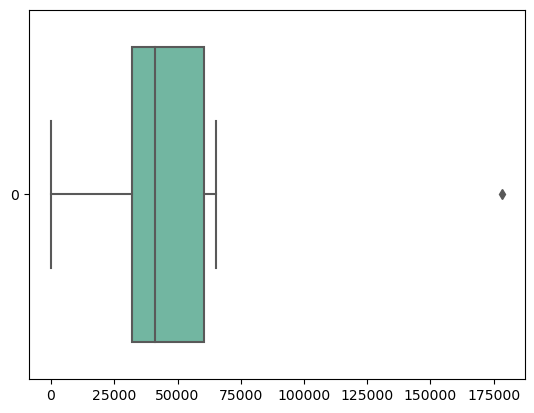

Column  ('Advanced Economies', 2010)


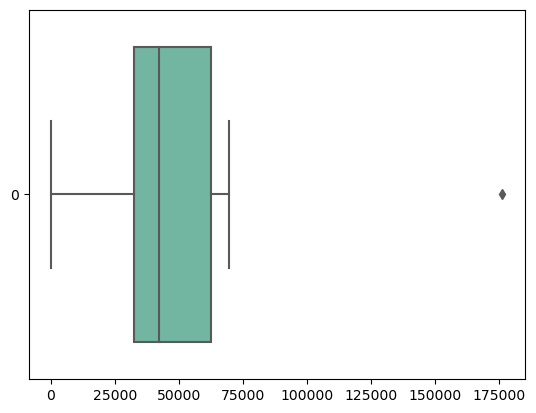

Column  ('Advanced Economies', 2011)


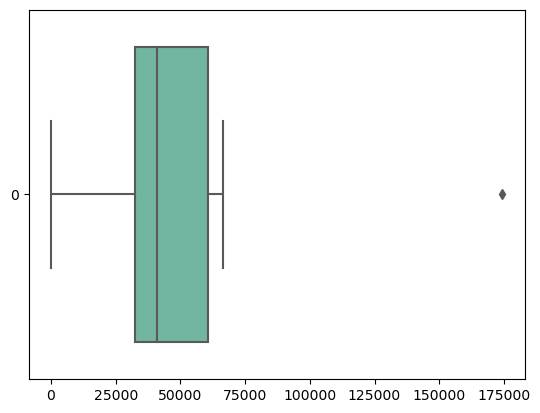

Column  ('Advanced Economies', 2012)


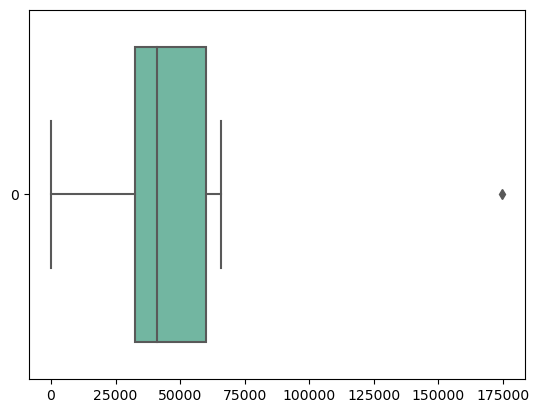

Column  ('Advanced Economies', 2013)


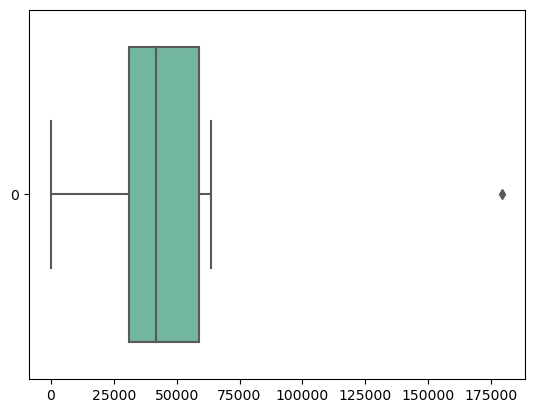

Column  ('Advanced Economies', 2014)


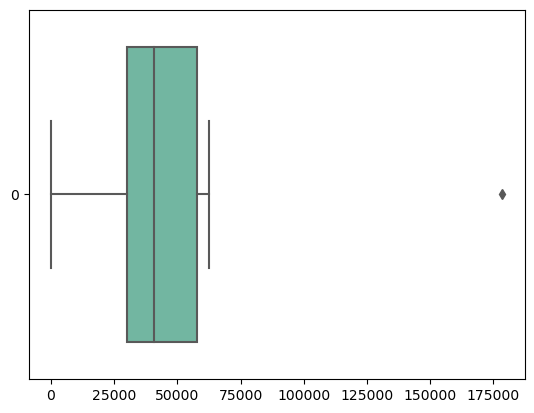

Column  ('Advanced Economies', 2015)


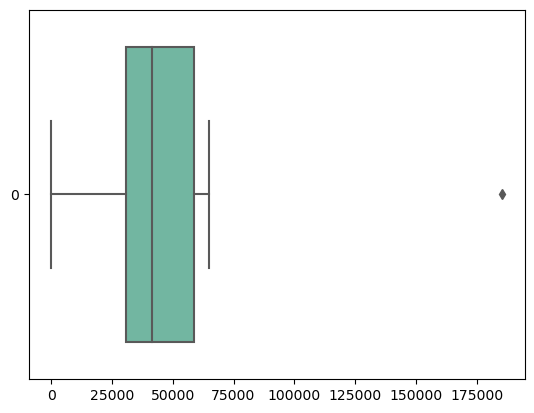

Column  ('Advanced Economies', 2016)


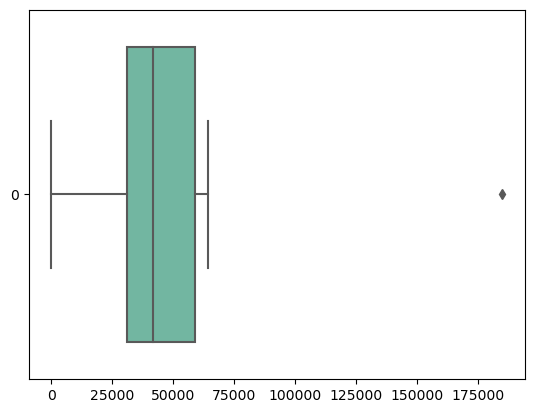

Column  ('Advanced Economies', 2017)


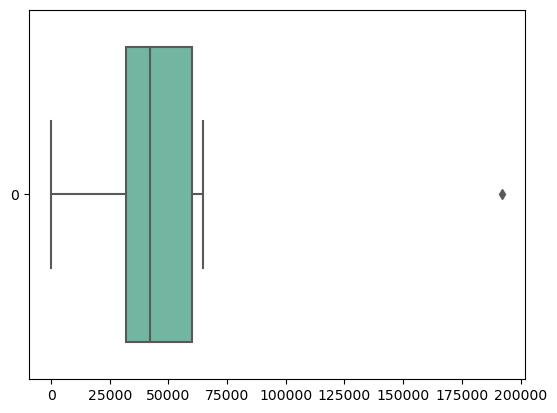

Column  ('Advanced Economies', 2018)


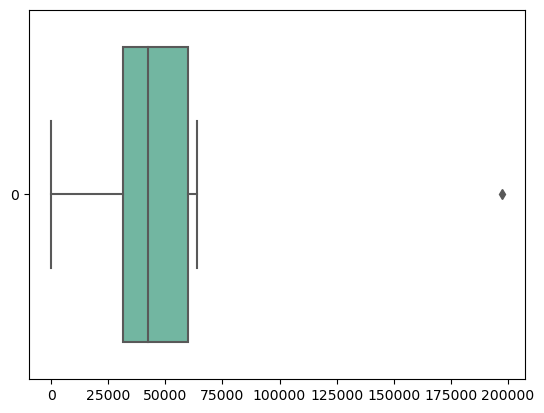

Column  ('Advanced Economies', 2019)


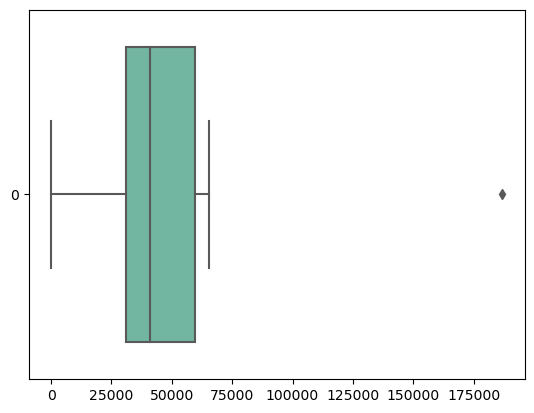

Column  ('Advanced Economies', 2020)


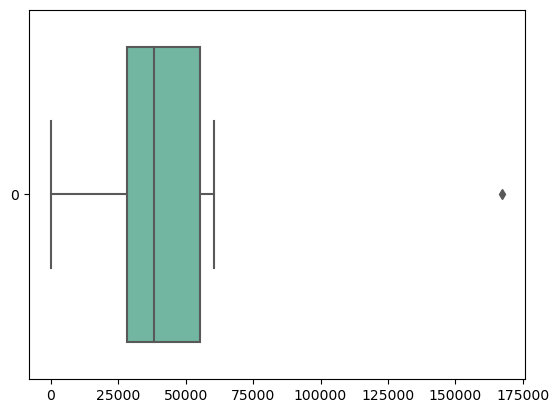

Column  ('Advanced Economies', 2021)


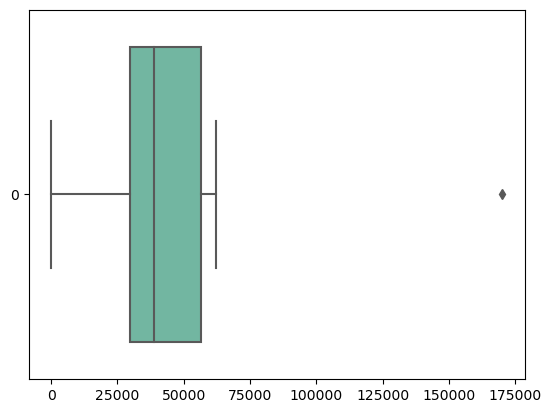

Column  ('Emerging\nMarket Economies\n', 1965)


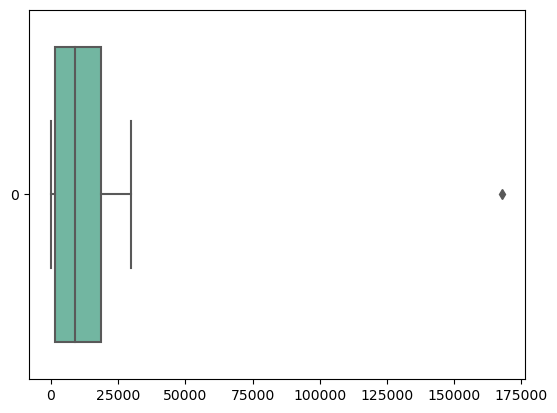

Column  ('Emerging\nMarket Economies\n', 1966)


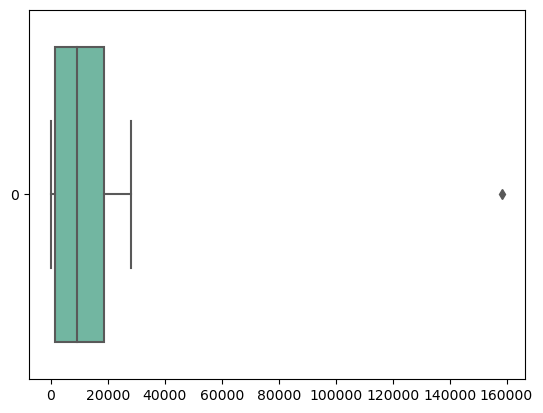

Column  ('Emerging\nMarket Economies\n', 1967)


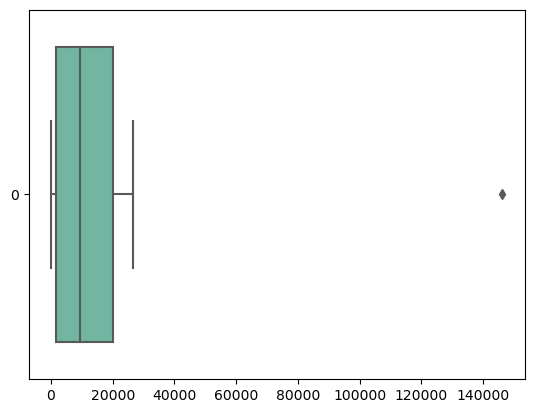

Column  ('Emerging\nMarket Economies\n', 1968)


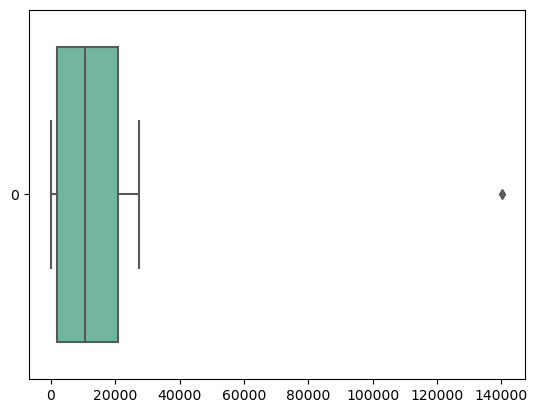

Column  ('Emerging\nMarket Economies\n', 1969)


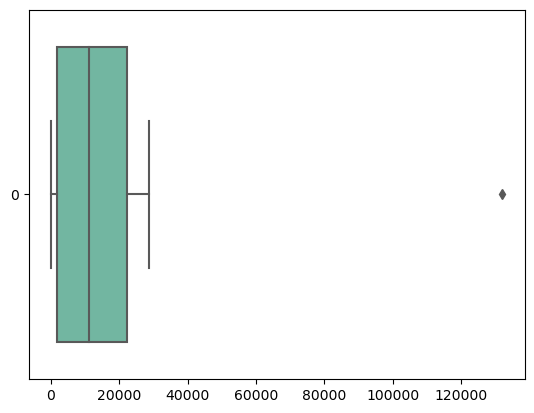

Column  ('Emerging\nMarket Economies\n', 1970)


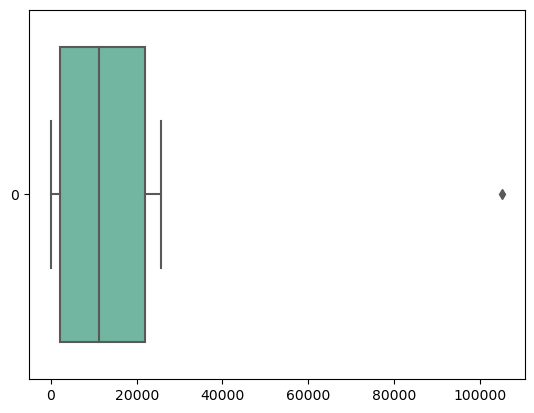

Column  ('Emerging\nMarket Economies\n', 1971)


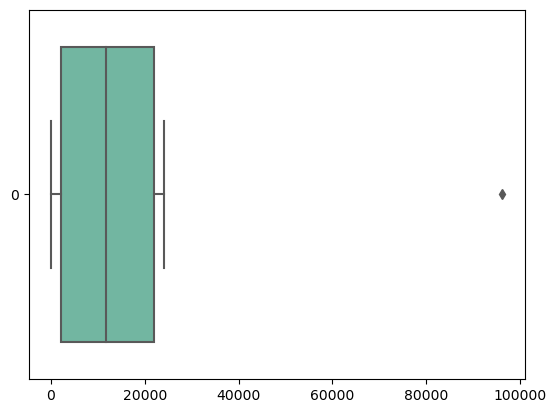

Column  ('Emerging\nMarket Economies\n', 1972)


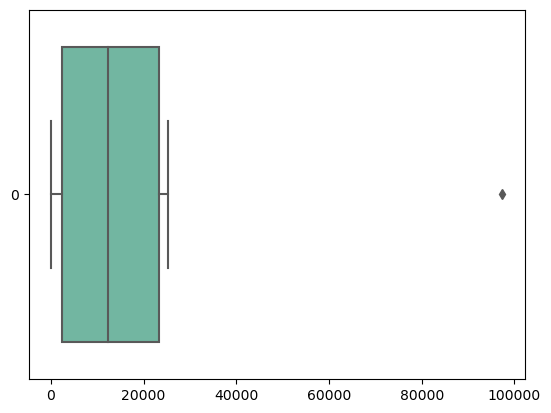

Column  ('Emerging\nMarket Economies\n', 1973)


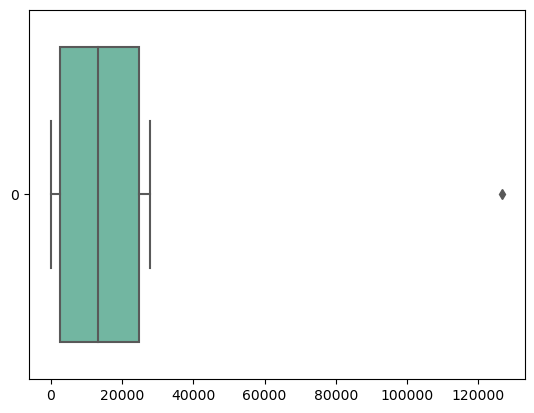

Column  ('Emerging\nMarket Economies\n', 1974)


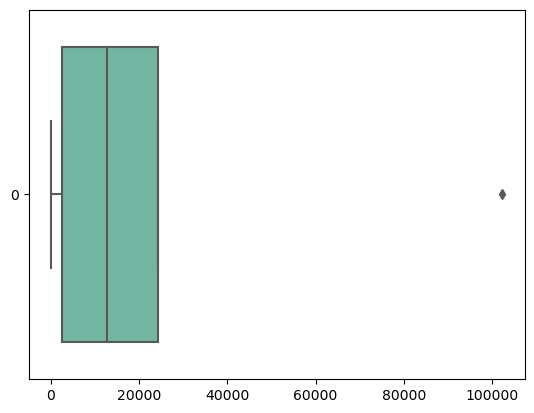

Column  ('Emerging\nMarket Economies\n', 1975)


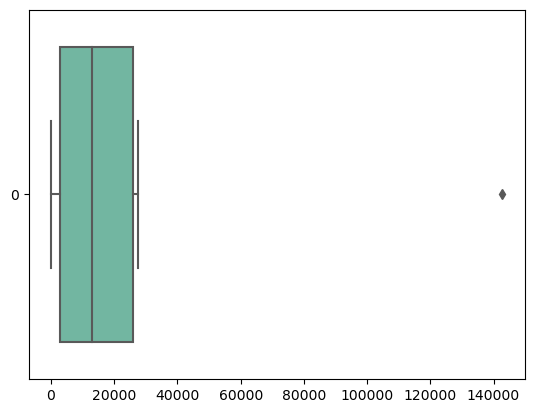

Column  ('Emerging\nMarket Economies\n', 1976)


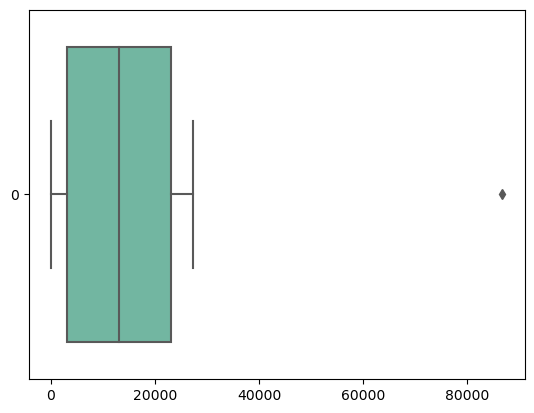

Column  ('Emerging\nMarket Economies\n', 1977)


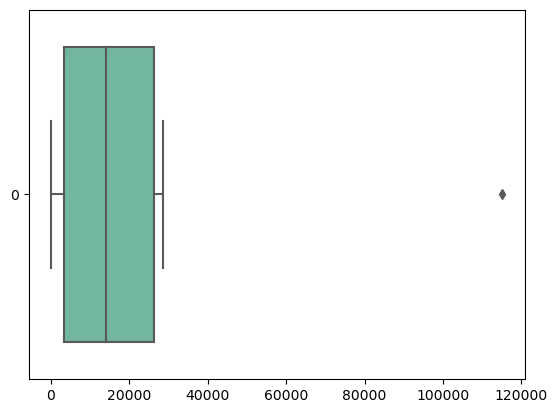

Column  ('Emerging\nMarket Economies\n', 1978)


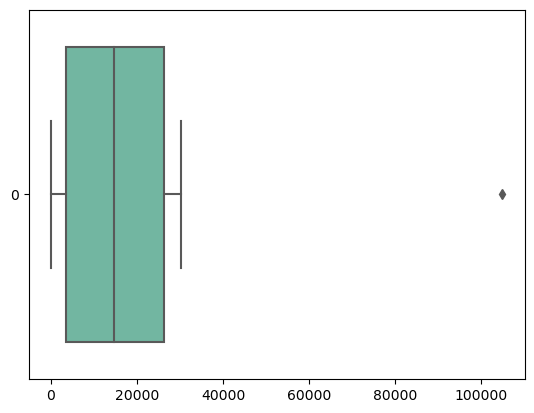

Column  ('Emerging\nMarket Economies\n', 1979)


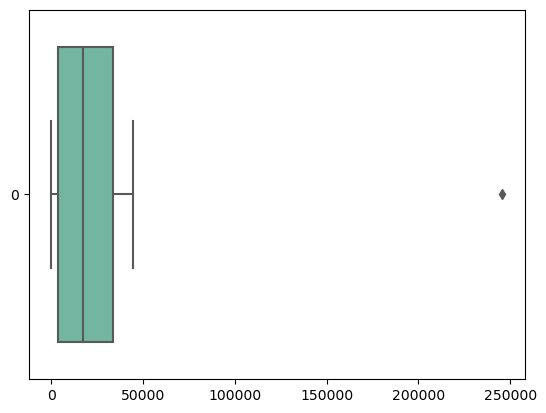

Column  ('Emerging\nMarket Economies\n', 1980)


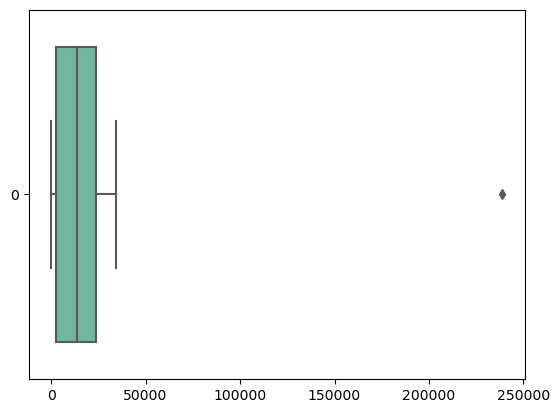

Column  ('Emerging\nMarket Economies\n', 1981)


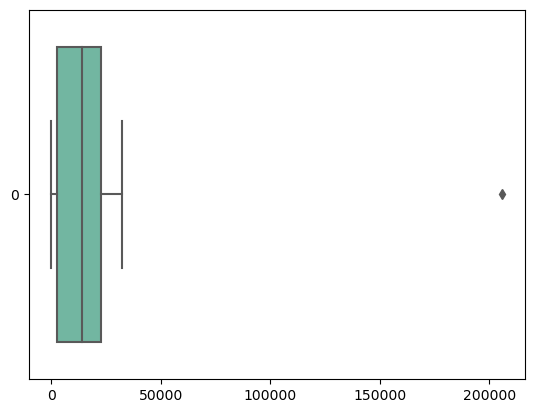

Column  ('Emerging\nMarket Economies\n', 1982)


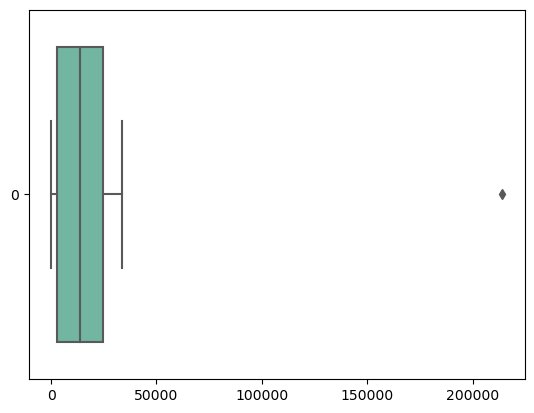

Column  ('Emerging\nMarket Economies\n', 1983)


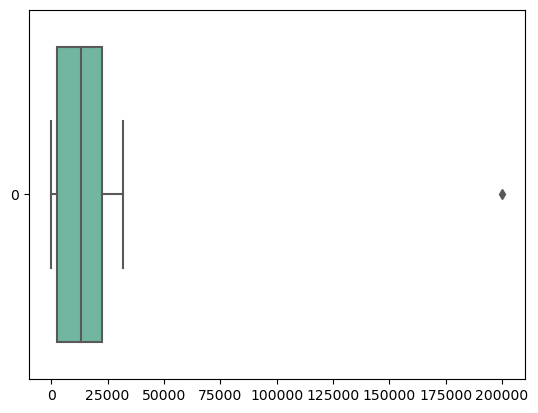

Column  ('Emerging\nMarket Economies\n', 1984)


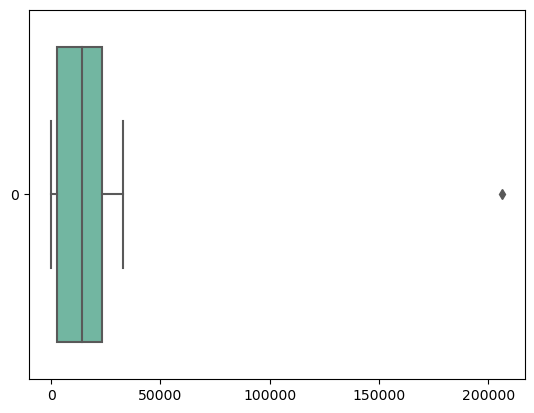

Column  ('Emerging\nMarket Economies\n', 1985)


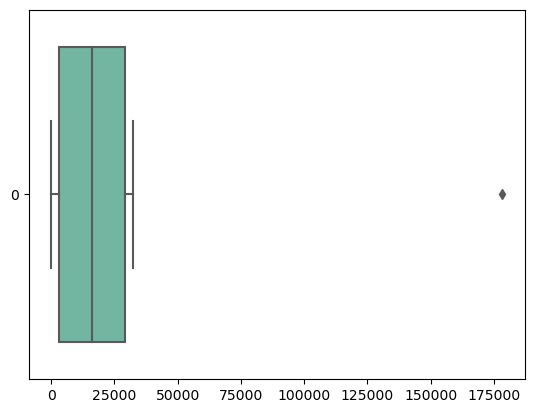

Column  ('Emerging\nMarket Economies\n', 1986)


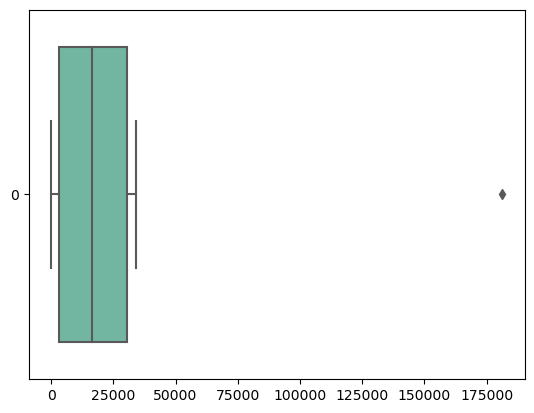

Column  ('Emerging\nMarket Economies\n', 1987)


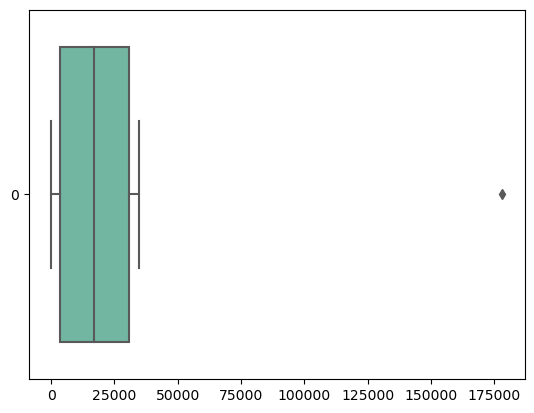

Column  ('Emerging\nMarket Economies\n', 1988)


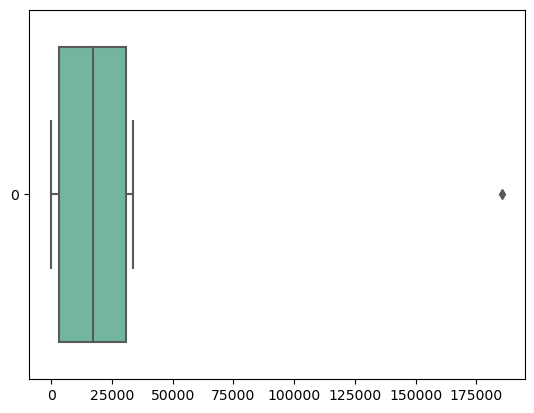

Column  ('Emerging\nMarket Economies\n', 1989)


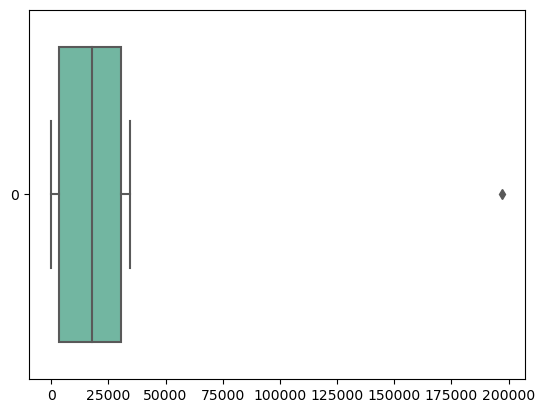

Column  ('Emerging\nMarket Economies\n', 1990)


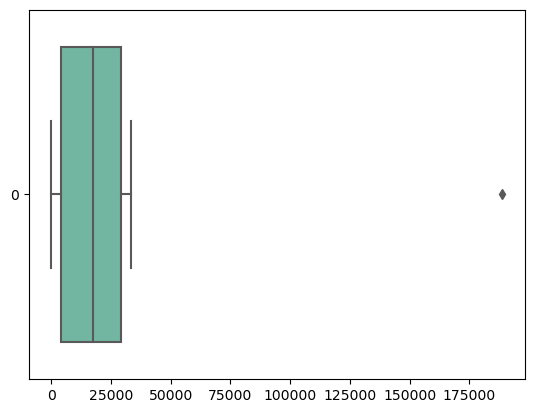

Column  ('Emerging\nMarket Economies\n', 1991)


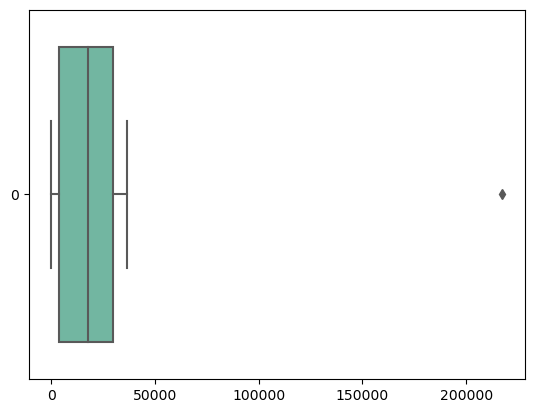

Column  ('Emerging\nMarket Economies\n', 1992)


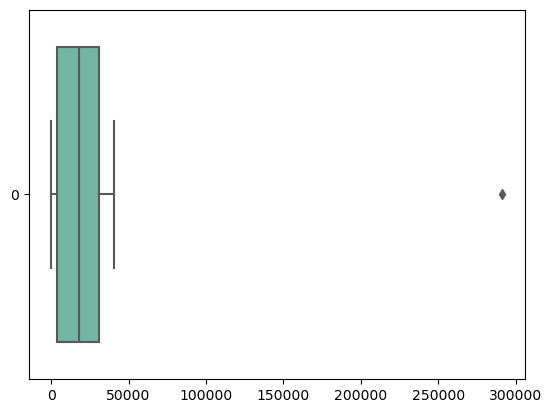

Column  ('Emerging\nMarket Economies\n', 1993)


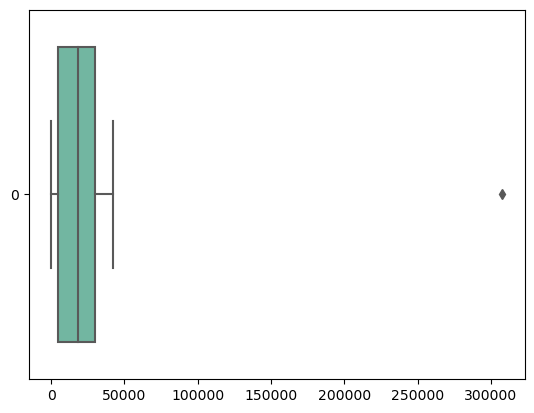

Column  ('Emerging\nMarket Economies\n', 1994)


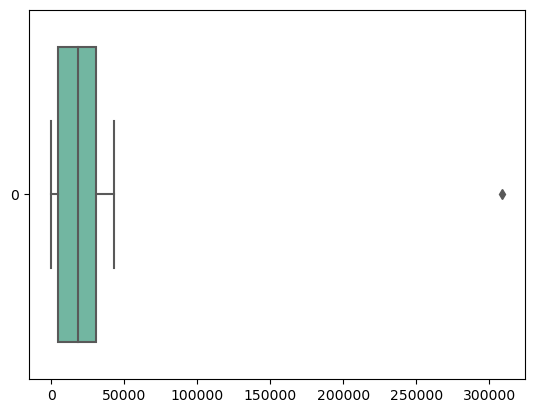

Column  ('Emerging\nMarket Economies\n', 1995)


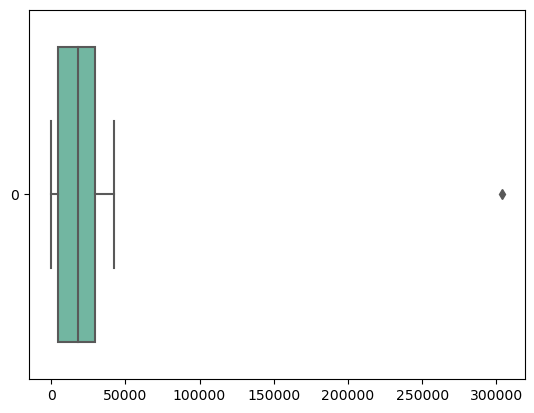

Column  ('Emerging\nMarket Economies\n', 1996)


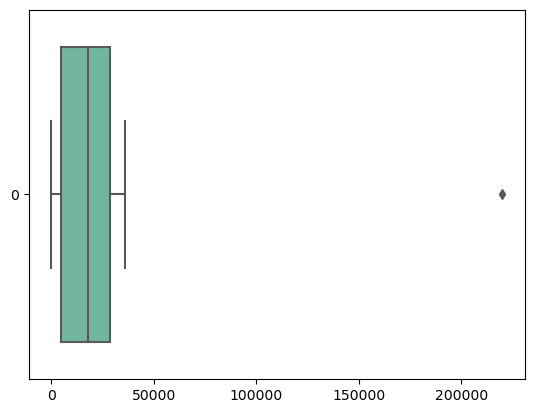

Column  ('Emerging\nMarket Economies\n', 1997)


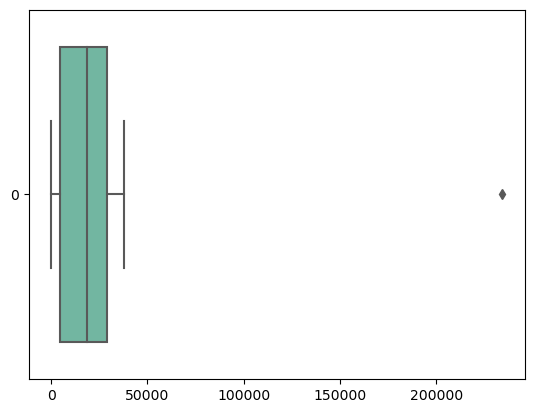

Column  ('Emerging\nMarket Economies\n', 1998)


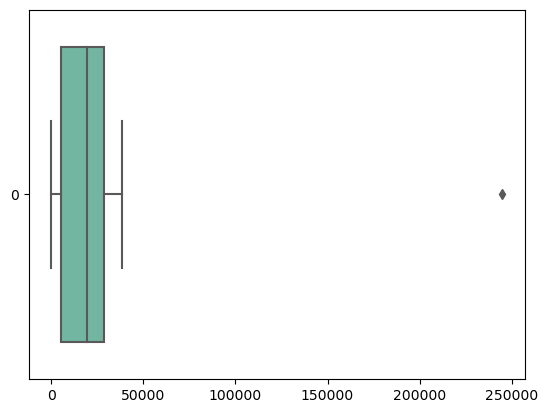

Column  ('Emerging\nMarket Economies\n', 1999)


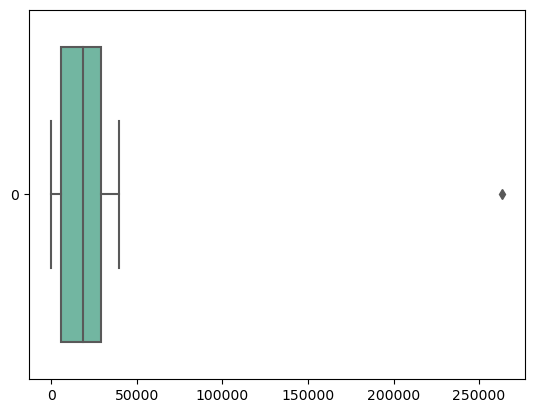

Column  ('Emerging\nMarket Economies\n', 2000)


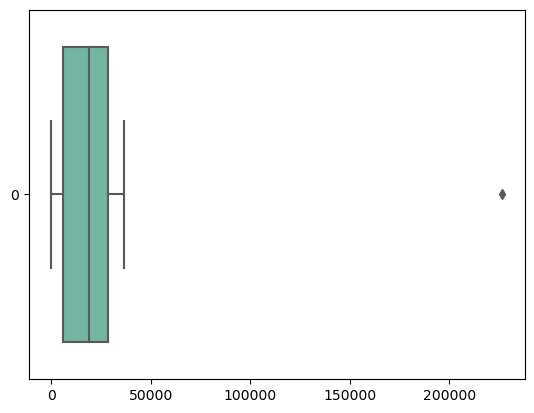

Column  ('Emerging\nMarket Economies\n', 2001)


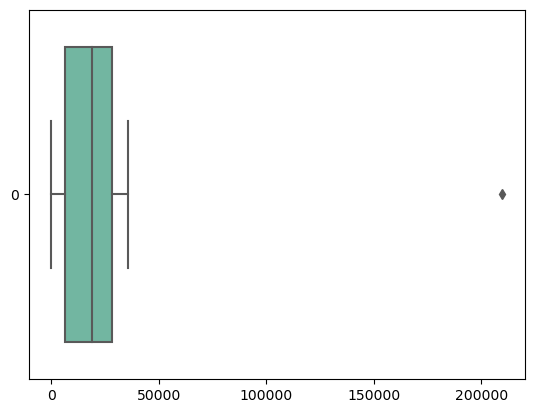

Column  ('Emerging\nMarket Economies\n', 2002)


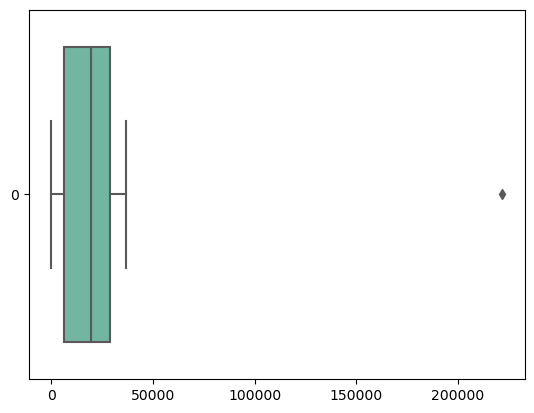

Column  ('Emerging\nMarket Economies\n', 2003)


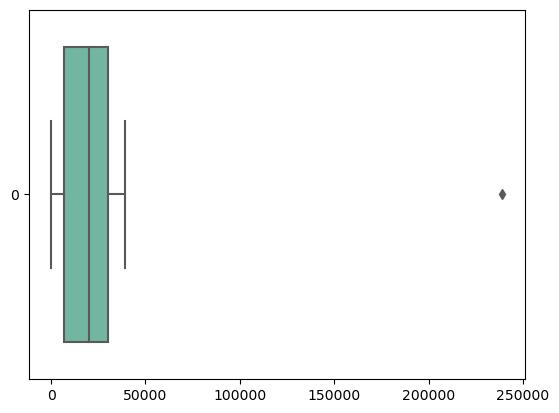

Column  ('Emerging\nMarket Economies\n', 2004)


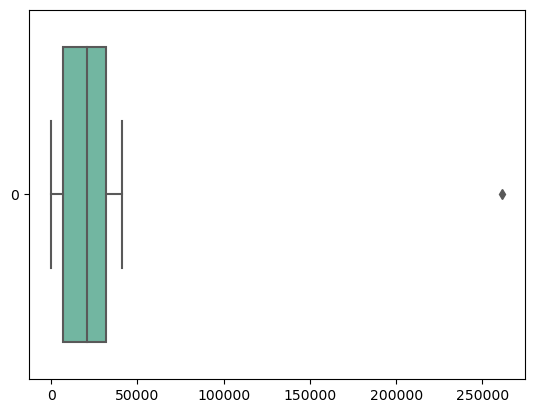

Column  ('Emerging\nMarket Economies\n', 2005)


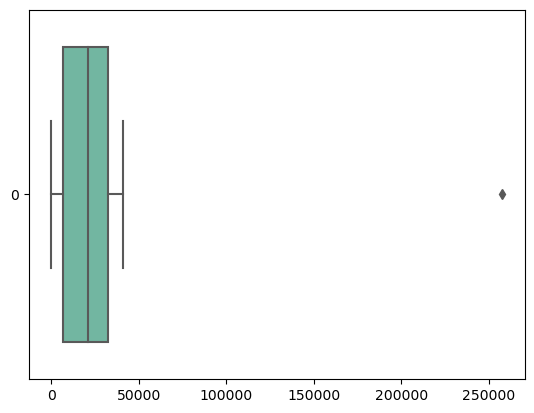

Column  ('Emerging\nMarket Economies\n', 2006)


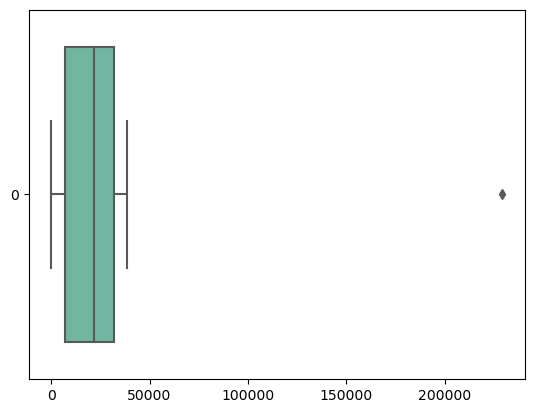

Column  ('Emerging\nMarket Economies\n', 2007)


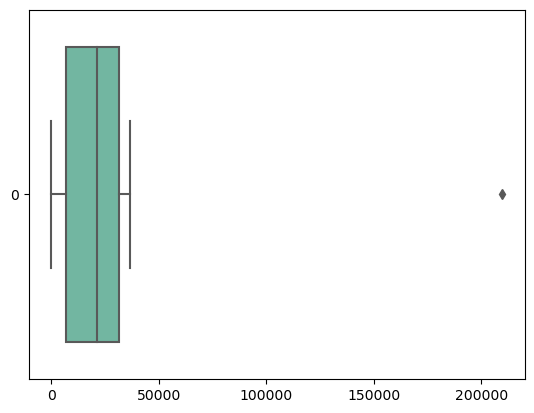

Column  ('Emerging\nMarket Economies\n', 2008)


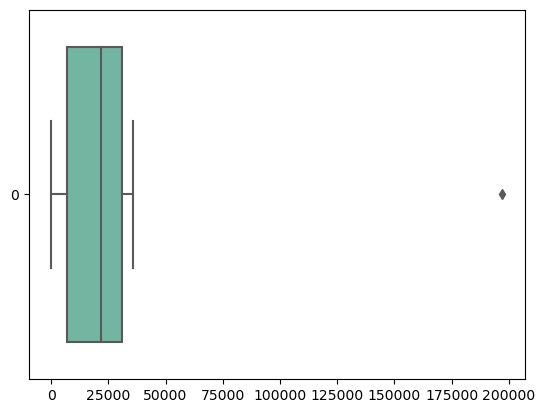

Column  ('Emerging\nMarket Economies\n', 2009)


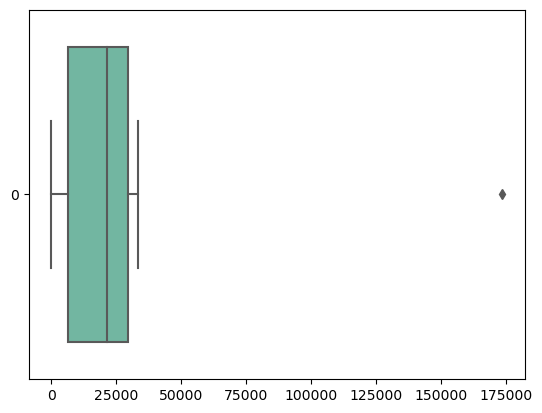

Column  ('Emerging\nMarket Economies\n', 2010)


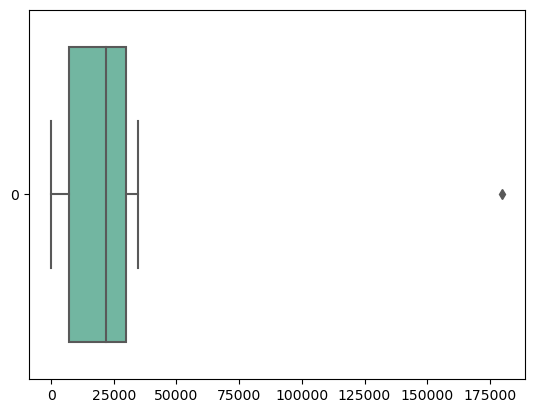

Column  ('Emerging\nMarket Economies\n', 2011)


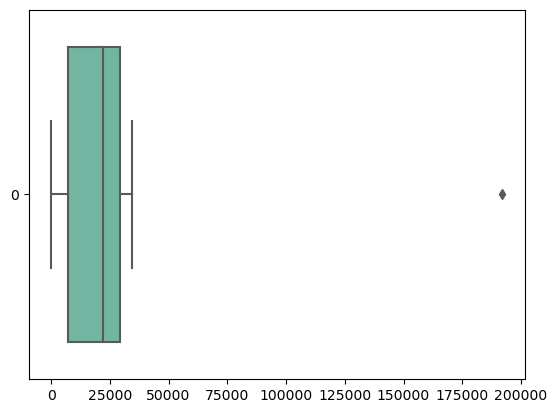

Column  ('Emerging\nMarket Economies\n', 2012)


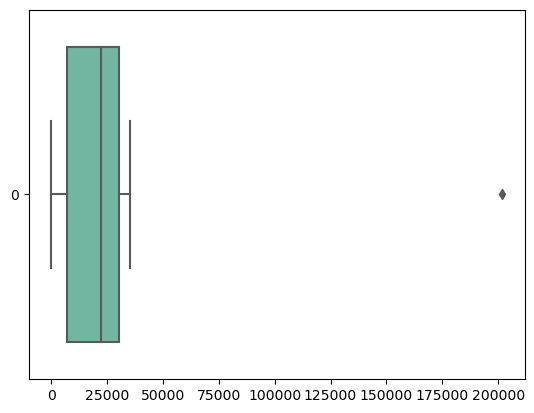

Column  ('Emerging\nMarket Economies\n', 2013)


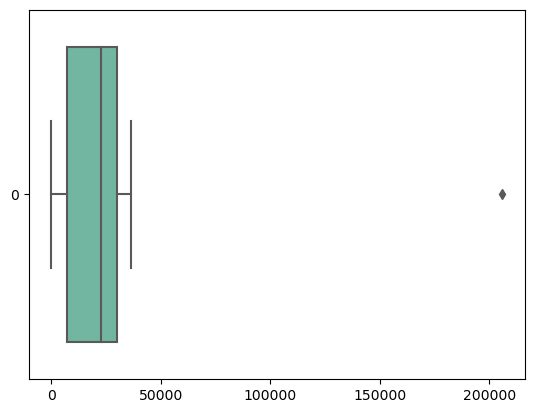

Column  ('Emerging\nMarket Economies\n', 2014)


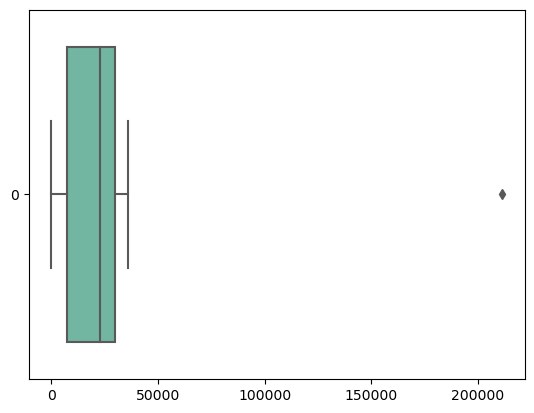

Column  ('Emerging\nMarket Economies\n', 2015)


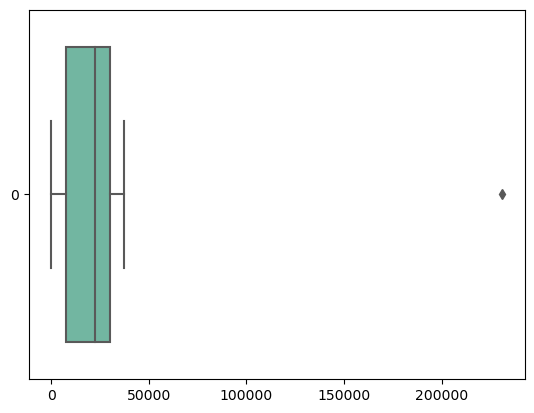

Column  ('Emerging\nMarket Economies\n', 2016)


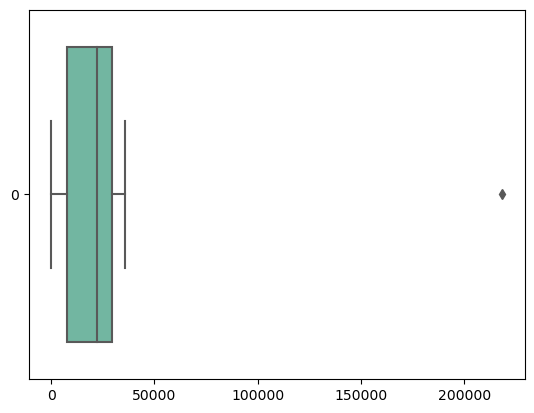

Column  ('Emerging\nMarket Economies\n', 2017)


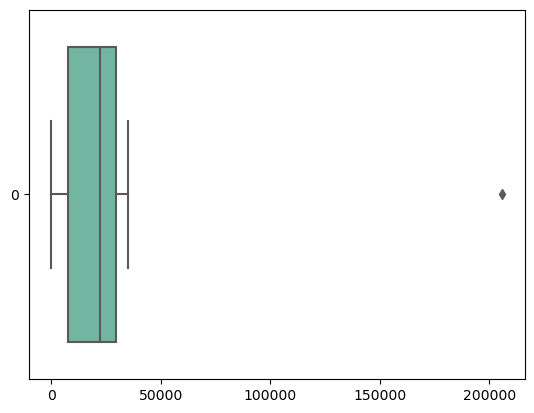

Column  ('Emerging\nMarket Economies\n', 2018)


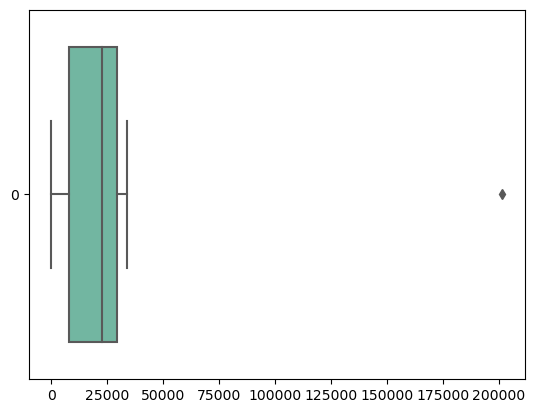

Column  ('Emerging\nMarket Economies\n', 2019)


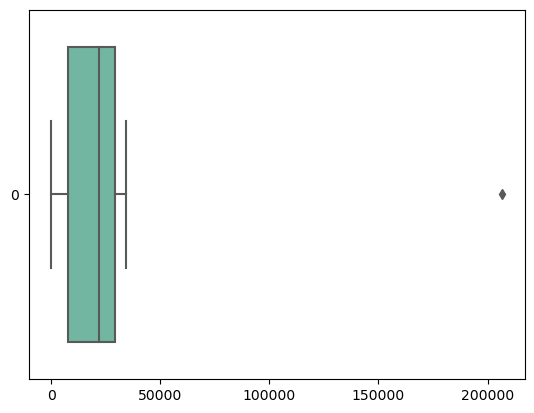

Column  ('Emerging\nMarket Economies\n', 2020)


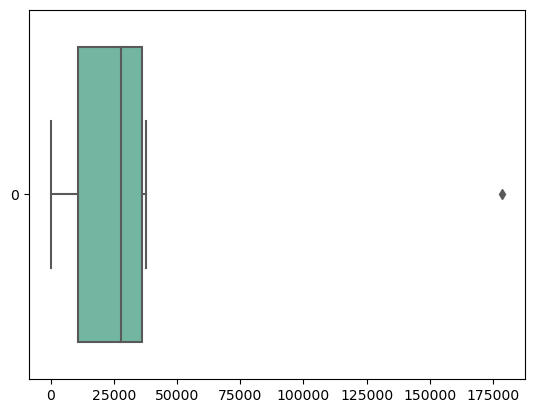

Column  ('Emerging\nMarket Economies\n', 2021)


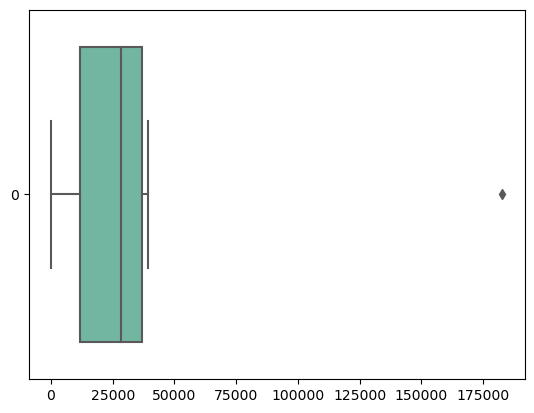

Column  ('Low-Income Developing\nCountries\n', 1965)


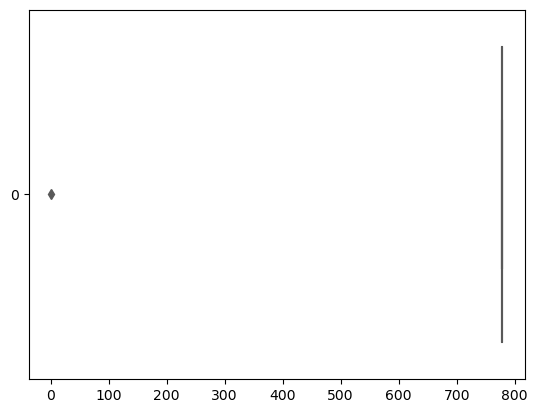

Column  ('Low-Income Developing\nCountries\n', 1966)


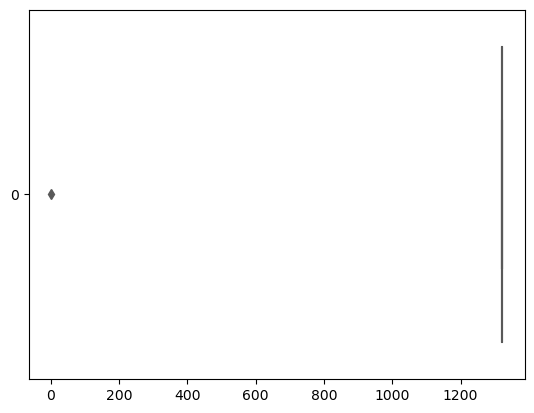

Column  ('Low-Income Developing\nCountries\n', 1967)


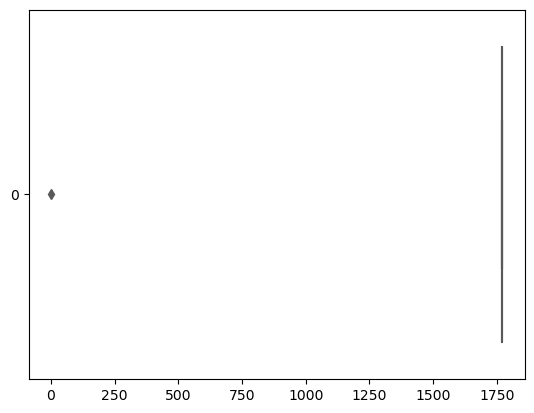

Column  ('Low-Income Developing\nCountries\n', 1968)


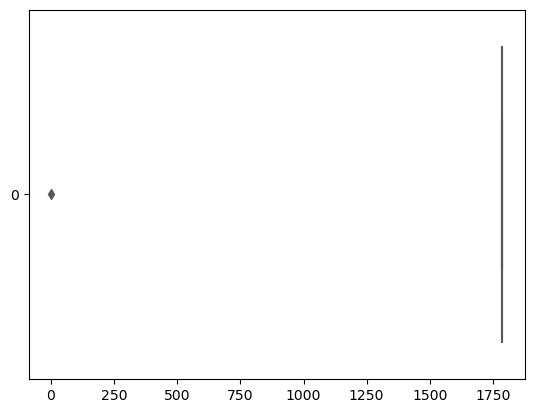

Column  ('Low-Income Developing\nCountries\n', 1969)


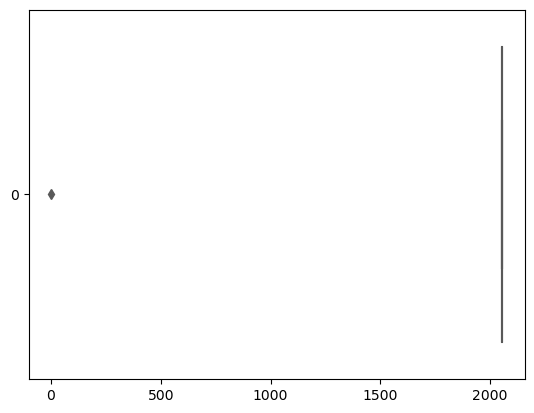

Column  ('Low-Income Developing\nCountries\n', 1970)


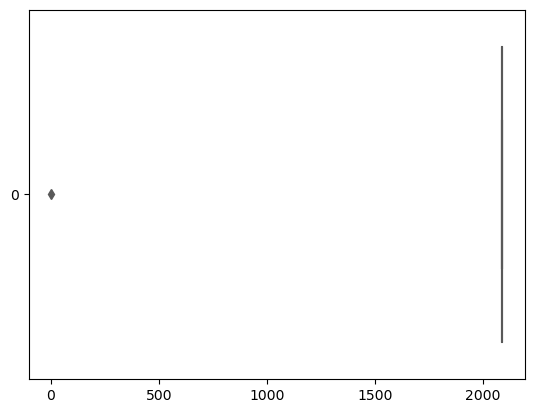

Column  ('Low-Income Developing\nCountries\n', 1971)


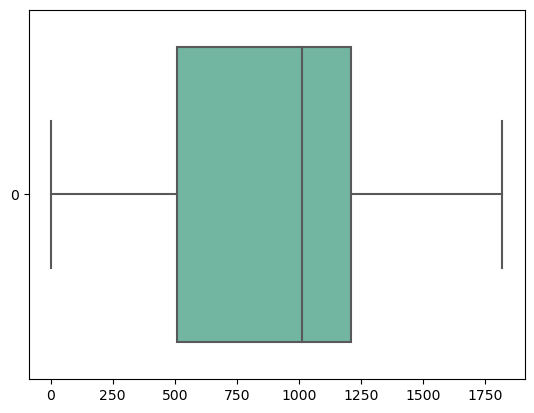

Column  ('Low-Income Developing\nCountries\n', 1972)


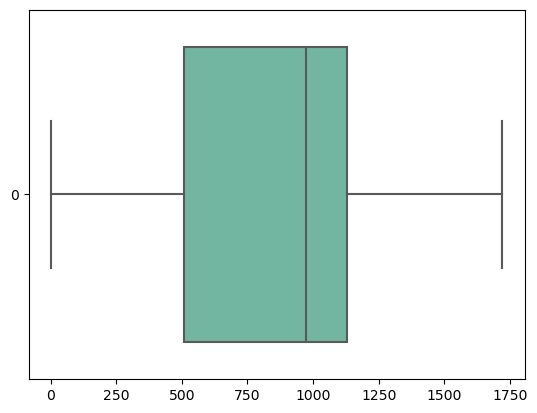

Column  ('Low-Income Developing\nCountries\n', 1973)


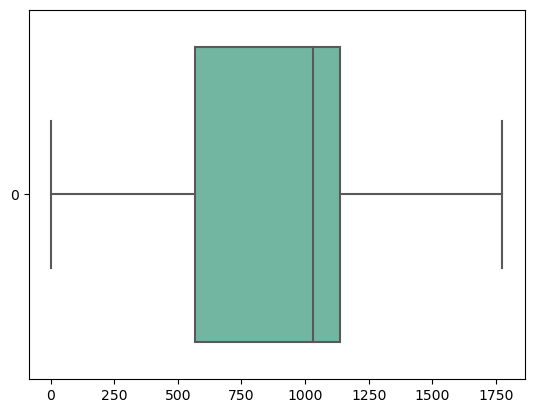

Column  ('Low-Income Developing\nCountries\n', 1974)


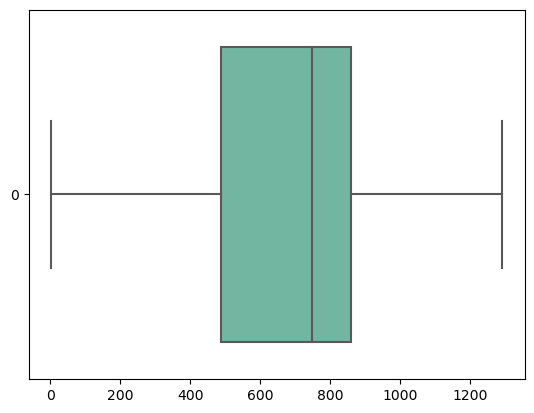

Column  ('Low-Income Developing\nCountries\n', 1975)


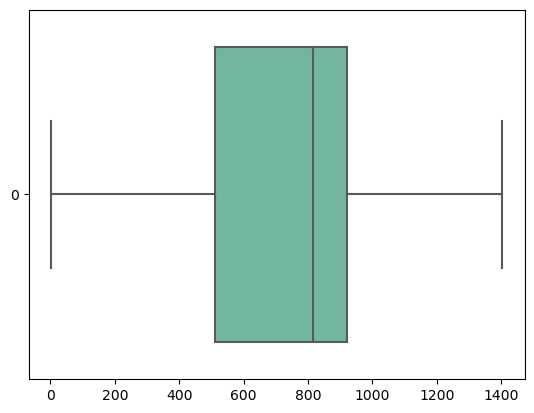

Column  ('Low-Income Developing\nCountries\n', 1976)


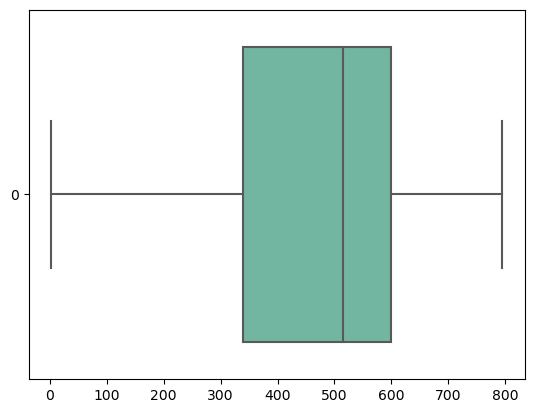

Column  ('Low-Income Developing\nCountries\n', 1977)


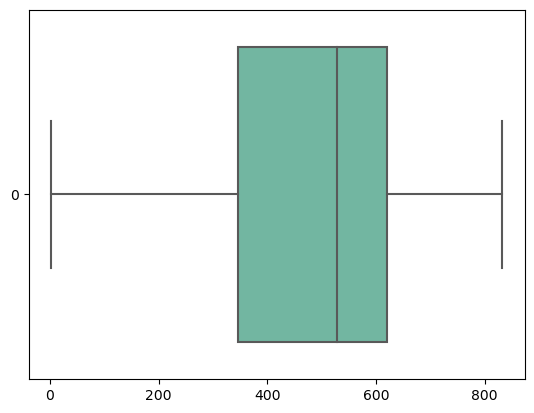

Column  ('Low-Income Developing\nCountries\n', 1978)


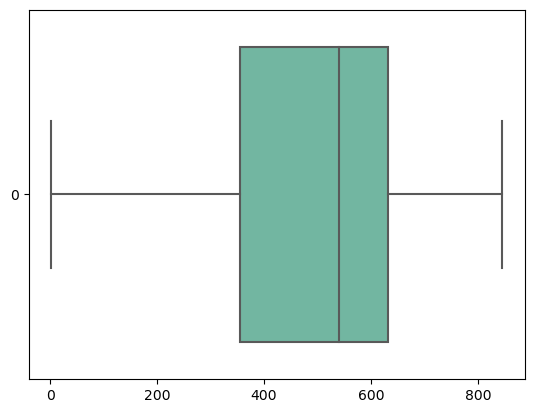

Column  ('Low-Income Developing\nCountries\n', 1979)


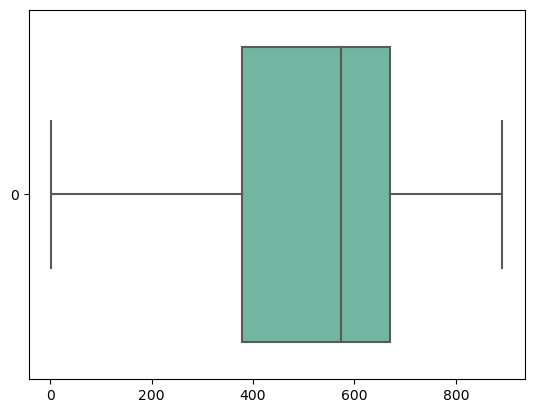

Column  ('Low-Income Developing\nCountries\n', 1980)


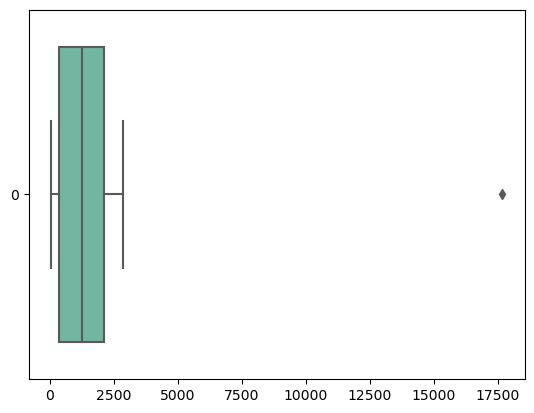

Column  ('Low-Income Developing\nCountries\n', 1981)


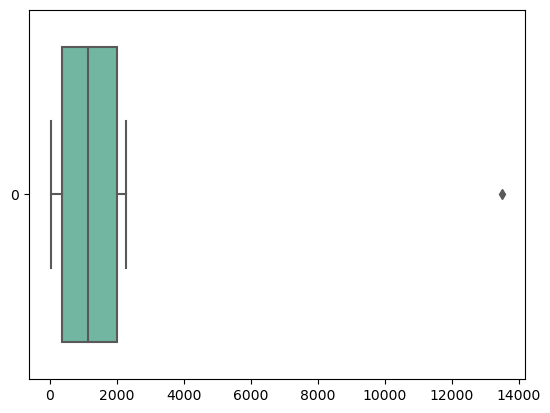

Column  ('Low-Income Developing\nCountries\n', 1982)


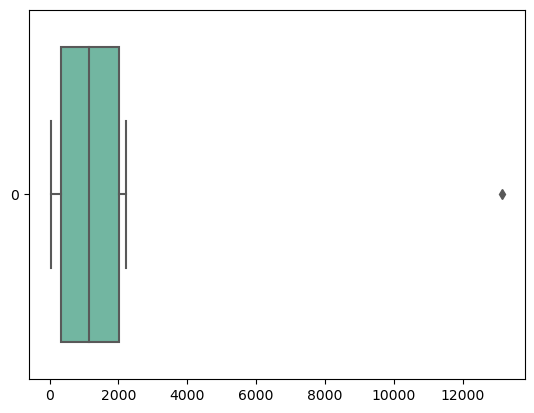

Column  ('Low-Income Developing\nCountries\n', 1983)


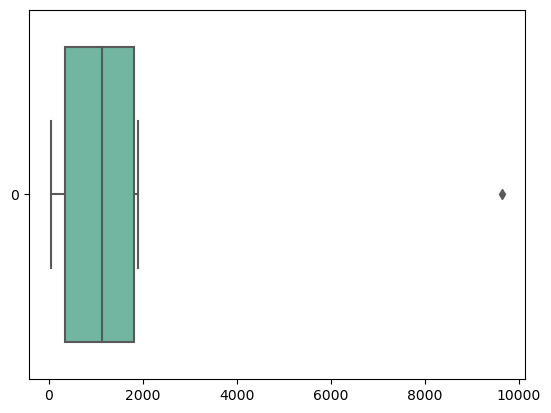

Column  ('Low-Income Developing\nCountries\n', 1984)


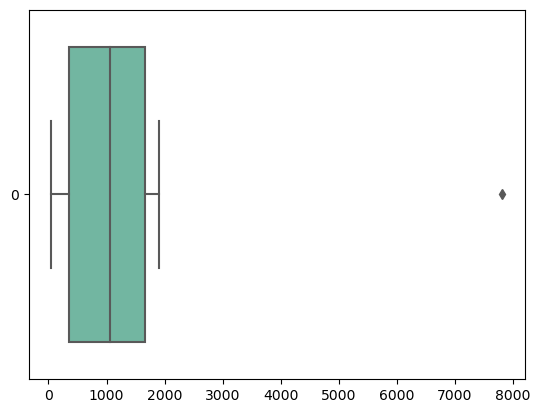

Column  ('Low-Income Developing\nCountries\n', 1985)


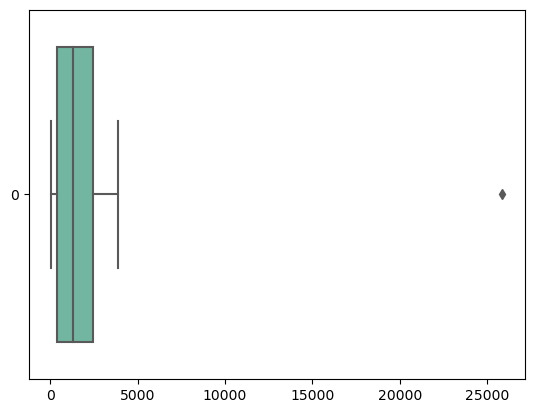

Column  ('Low-Income Developing\nCountries\n', 1986)


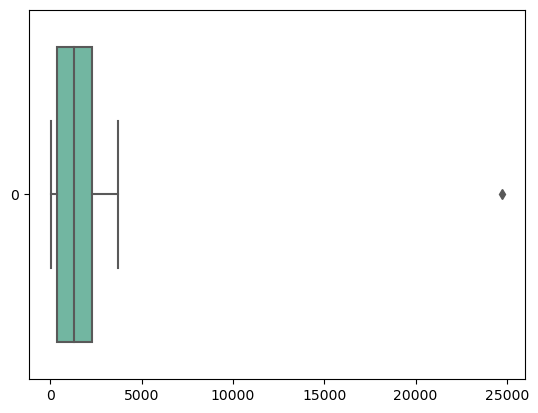

Column  ('Low-Income Developing\nCountries\n', 1987)


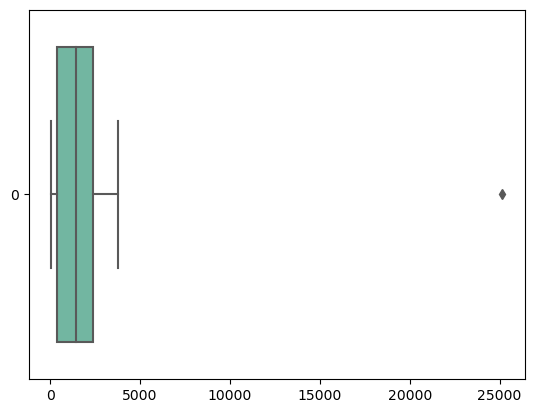

Column  ('Low-Income Developing\nCountries\n', 1988)


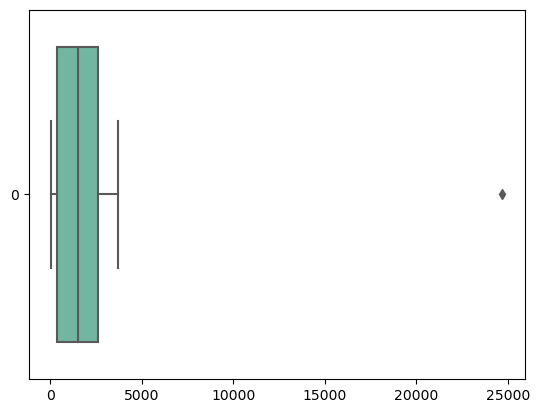

Column  ('Low-Income Developing\nCountries\n', 1989)


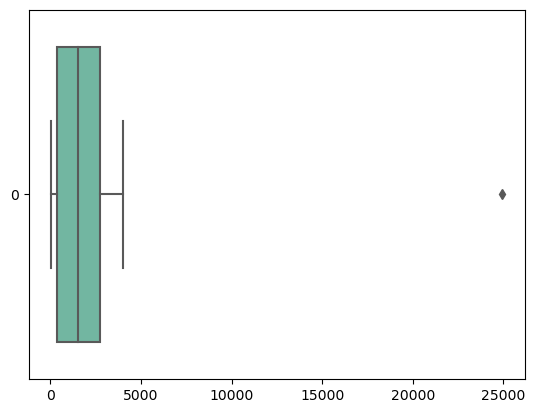

Column  ('Low-Income Developing\nCountries\n', 1990)


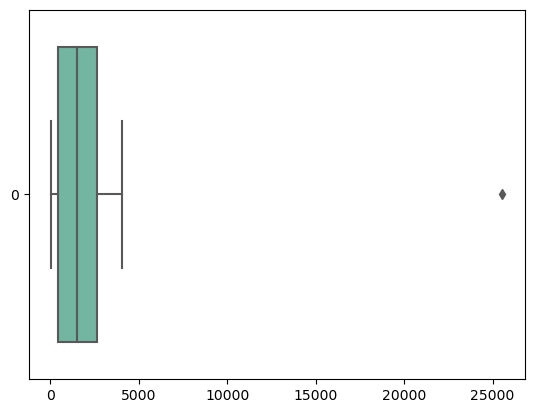

Column  ('Low-Income Developing\nCountries\n', 1991)


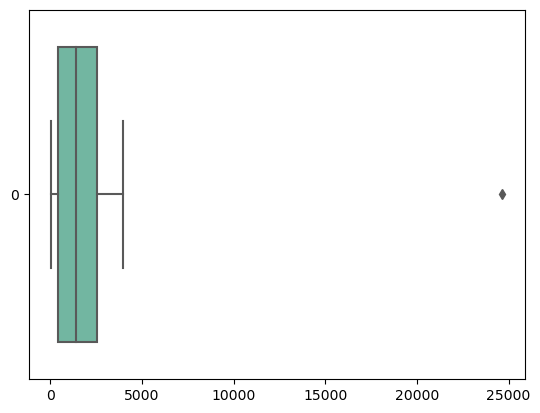

Column  ('Low-Income Developing\nCountries\n', 1992)


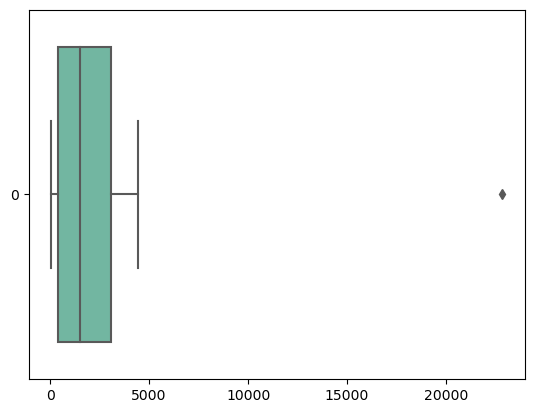

Column  ('Low-Income Developing\nCountries\n', 1993)


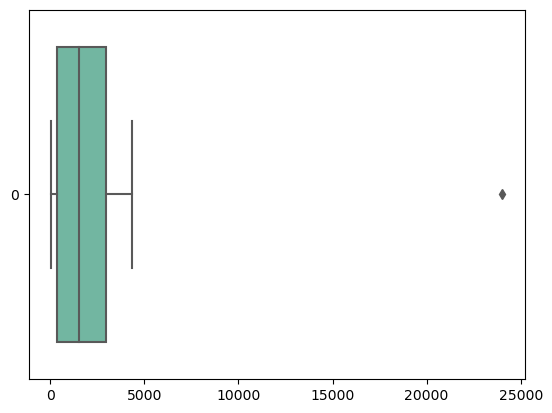

Column  ('Low-Income Developing\nCountries\n', 1994)


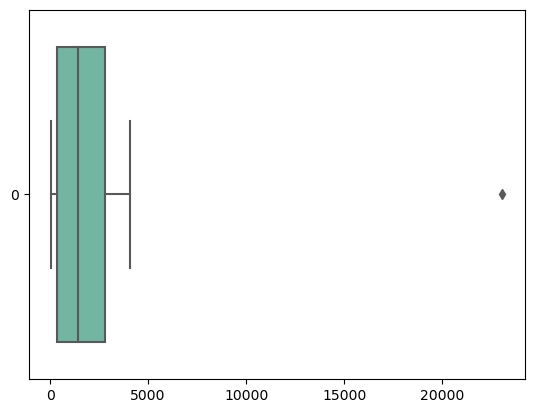

Column  ('Low-Income Developing\nCountries\n', 1995)


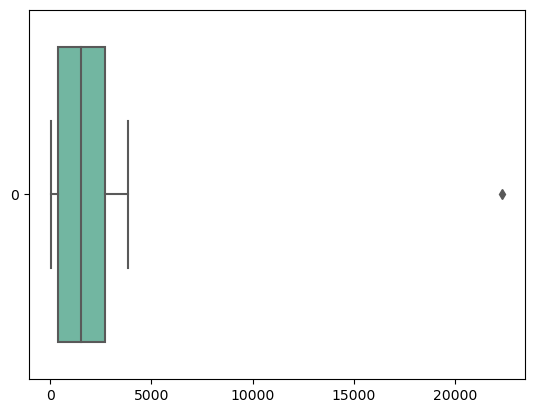

Column  ('Low-Income Developing\nCountries\n', 1996)


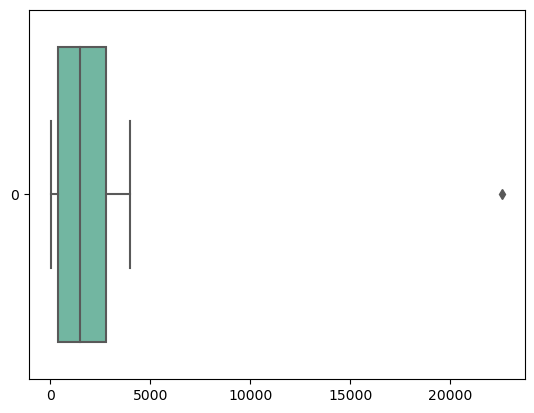

Column  ('Low-Income Developing\nCountries\n', 1997)


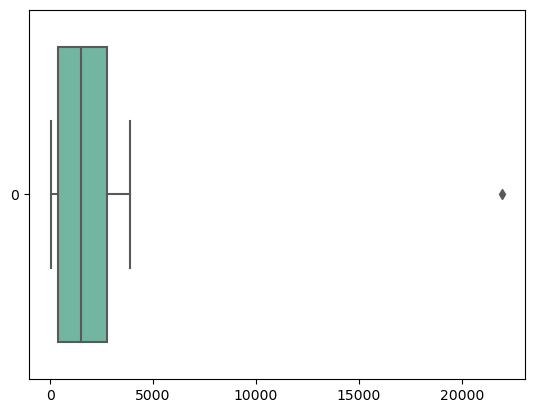

Column  ('Low-Income Developing\nCountries\n', 1998)


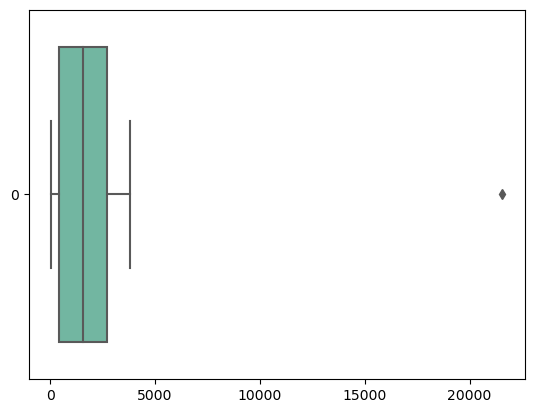

Column  ('Low-Income Developing\nCountries\n', 1999)


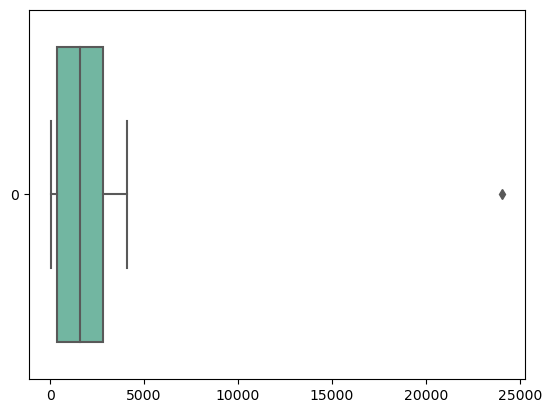

Column  ('Low-Income Developing\nCountries\n', 2000)


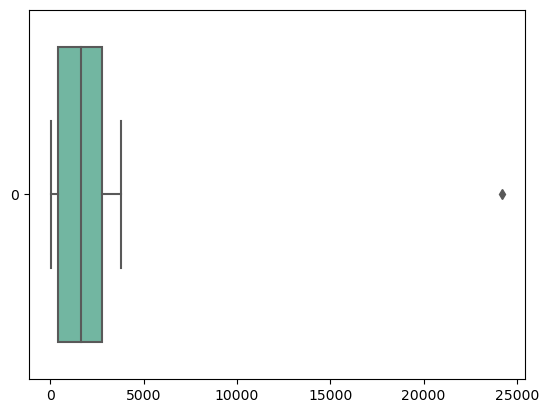

Column  ('Low-Income Developing\nCountries\n', 2001)


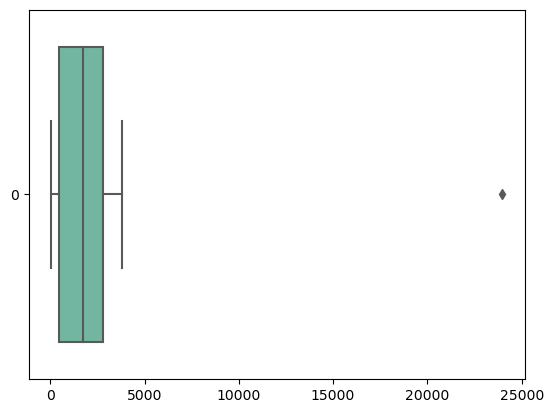

Column  ('Low-Income Developing\nCountries\n', 2002)


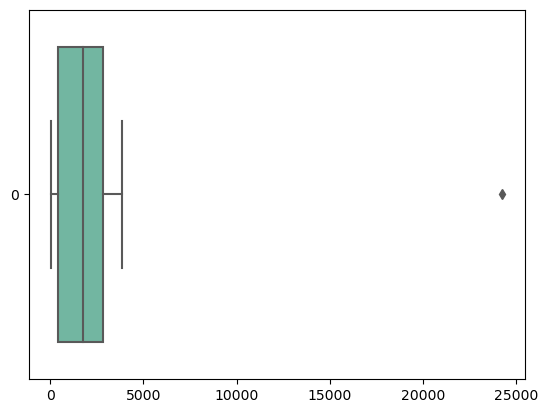

Column  ('Low-Income Developing\nCountries\n', 2003)


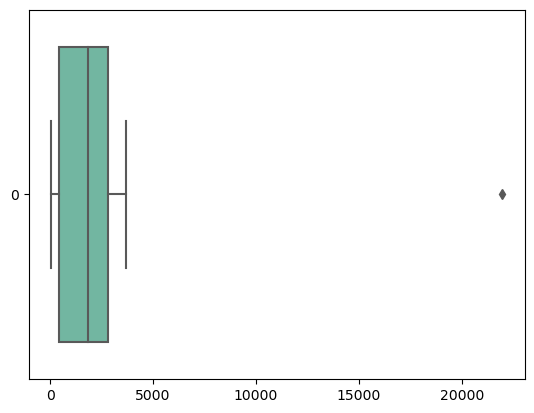

Column  ('Low-Income Developing\nCountries\n', 2004)


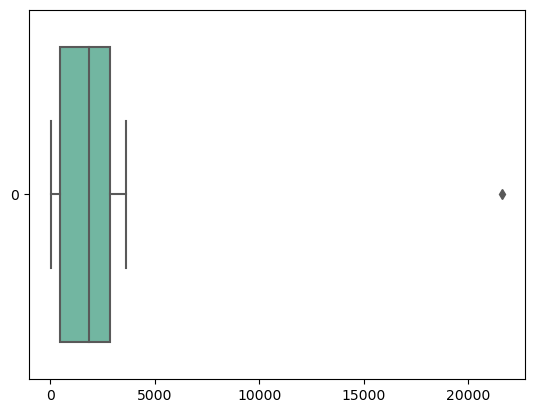

Column  ('Low-Income Developing\nCountries\n', 2005)


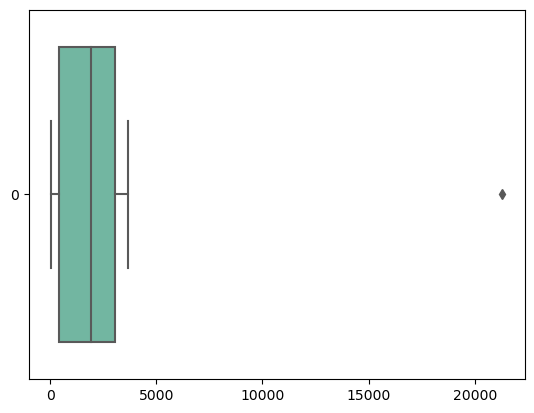

Column  ('Low-Income Developing\nCountries\n', 2006)


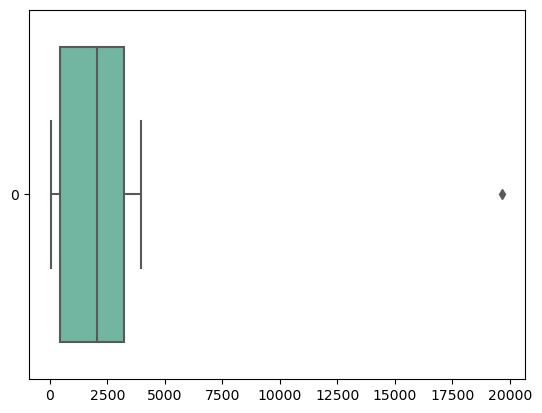

Column  ('Low-Income Developing\nCountries\n', 2007)


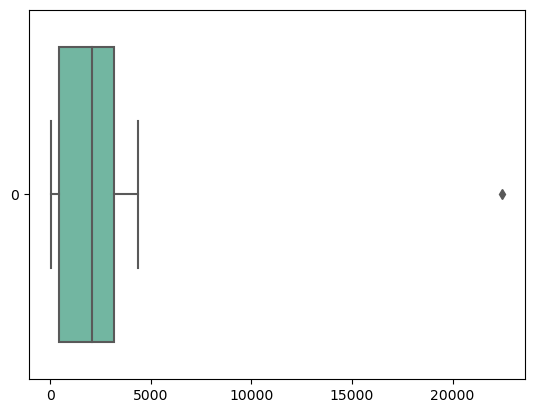

Column  ('Low-Income Developing\nCountries\n', 2008)


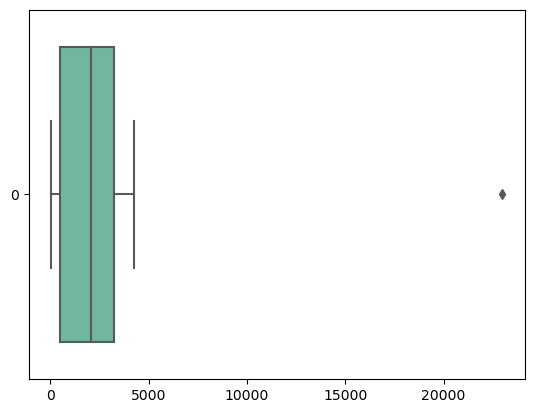

Column  ('Low-Income Developing\nCountries\n', 2009)


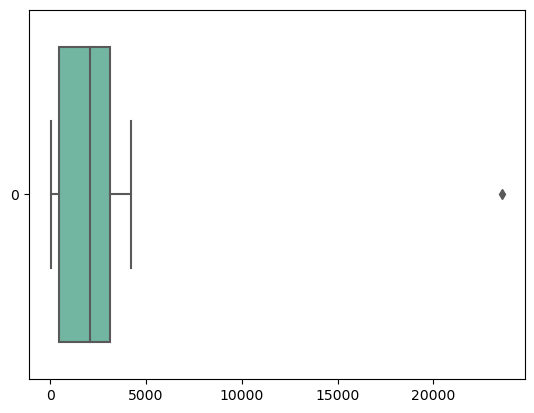

Column  ('Low-Income Developing\nCountries\n', 2010)


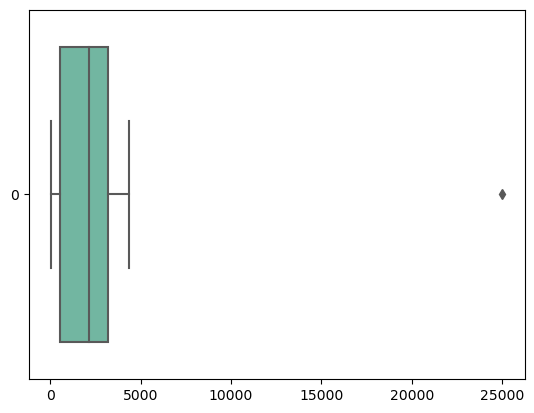

Column  ('Low-Income Developing\nCountries\n', 2011)


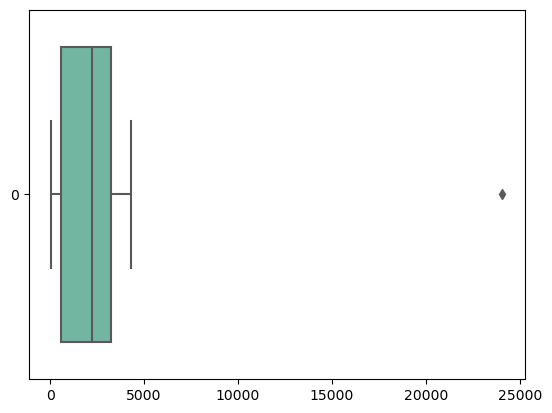

Column  ('Low-Income Developing\nCountries\n', 2012)


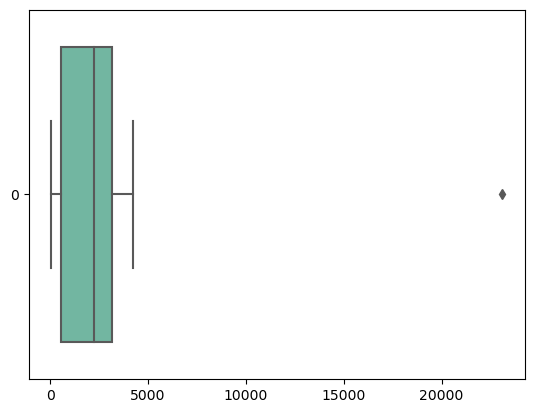

Column  ('Low-Income Developing\nCountries\n', 2013)


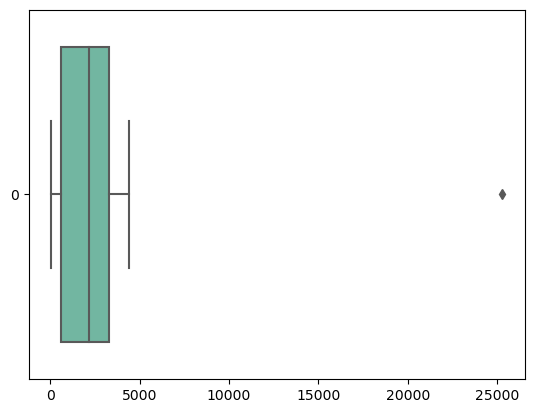

Column  ('Low-Income Developing\nCountries\n', 2014)


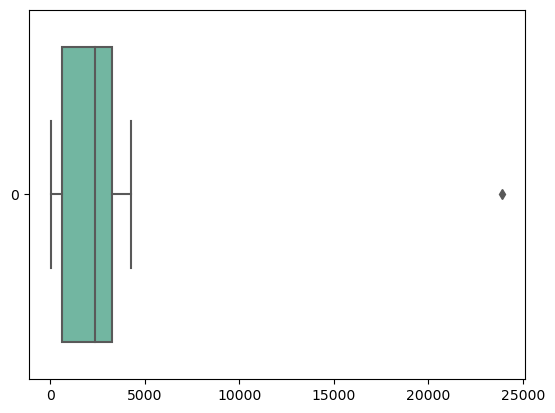

Column  ('Low-Income Developing\nCountries\n', 2015)


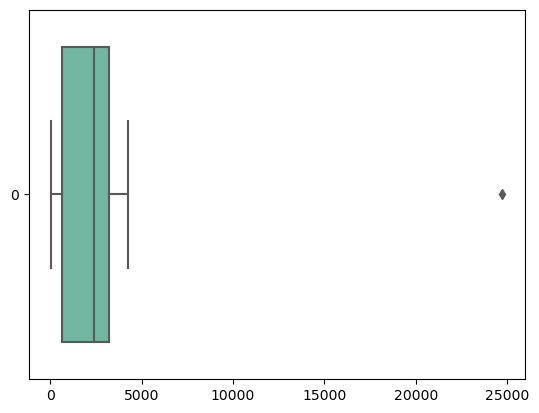

Column  ('Low-Income Developing\nCountries\n', 2016)


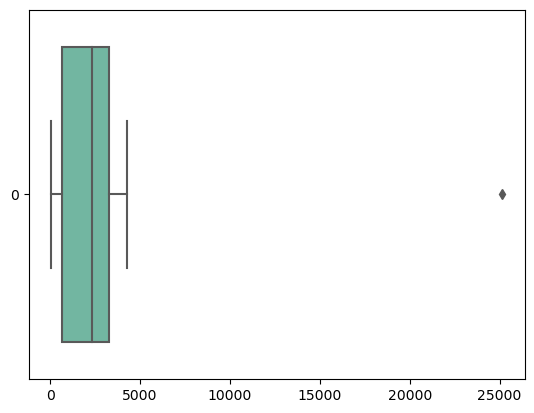

Column  ('Low-Income Developing\nCountries\n', 2017)


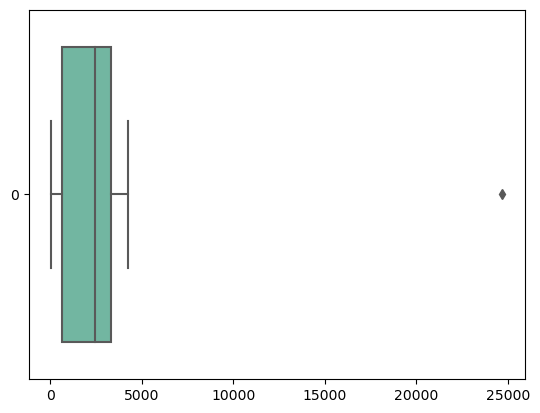

Column  ('Low-Income Developing\nCountries\n', 2018)


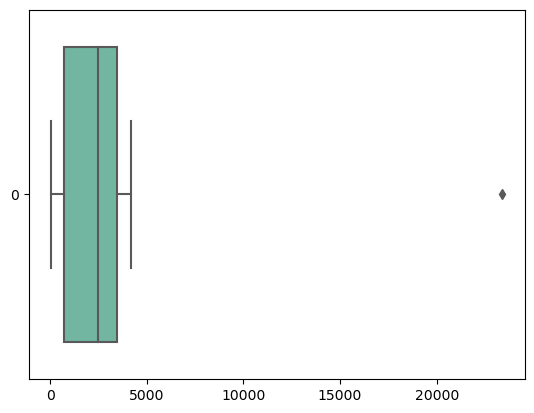

Column  ('Low-Income Developing\nCountries\n', 2019)


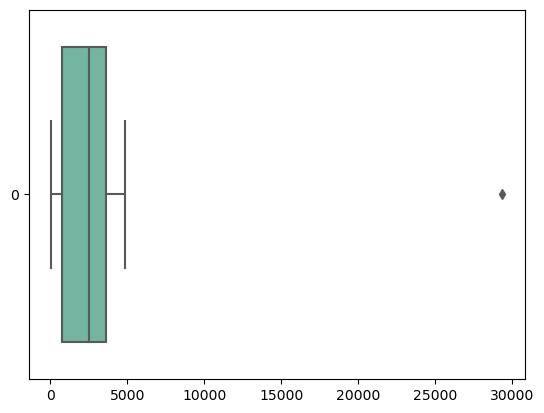

Column  ('Low-Income Developing\nCountries\n', 2020)


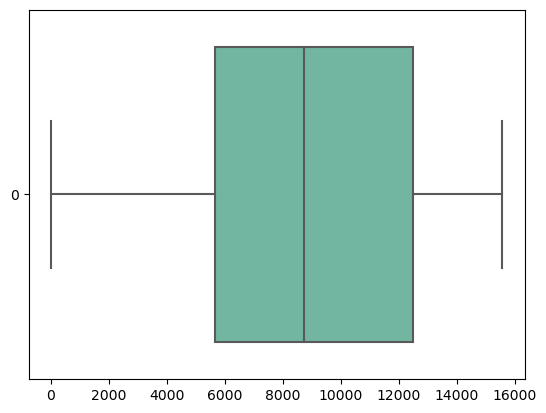

Column  ('Low-Income Developing\nCountries\n', 2021)


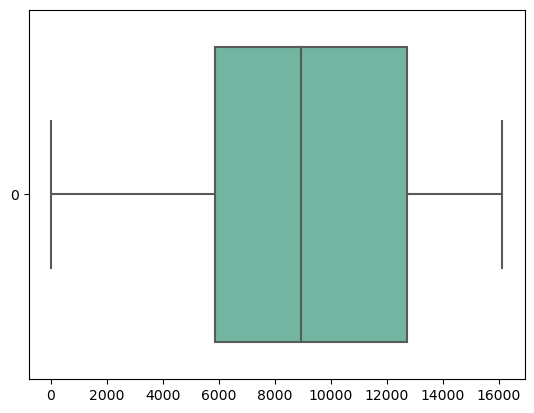

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
cols = Stats.columns
for i in range(0,len(cols)):
  print("Column ",Stats.columns[i])
  ax = sns.boxplot(data=Stats.iloc[:,i], orient="h", palette="Set2")
  plt.show()

After downloading the data, I checked the data first. In order to complete this problem, I only need to table A in FMEconGroup dataset, so I took this worksheet out of file. Then, in oder to make the merging process easily, I editted the layout of table A, one column is contry names and the other one is the income group (Advanced economies, Emerging market economies,or Low-income developing countries). \
After merging, I started to calculate some statstics for each group by year. I found the sum and mean seperately of Primary energy consumption per capita for each group from 1965 to 2021. I also generate the staitstics table about number of entities in each group, mean, standard deviation and so on.  \
In conclusion, the Primary energy consumption per capita of each income group has increasing trend in terms of mean.However, compared to the advanced economies, the energy consumption per capital of emerging market and low-income developing countries are much lower than advanced ecnomies. So the comsumption is imbanlaced around the world. Wealthy economic eneties are the main buyer of energy. 